<a href="https://colab.research.google.com/github/eeuunnjjiii/kagglestudy/blob/main/Kaggle%20survey/%5B2nd_kernel%5D_What_do_Kagglers_say_about_Data_Science%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 : What do Kagglers say about Data Science?(https://www.kaggle.com/mhajabri/what-do-kagglers-say-about-data-science)

# 캐글 데이터 연동

In [1]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"eunjijeong","key":"29fdf1c9b4bee7ef56c5520fc84d41dc"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d kaggle/kaggle-survey-2017
!unzip kaggle-survey-2017.zip

 85% 3.00M/3.52M [00:00<00:00, 10.7MB/s]
100% 3.52M/3.52M [00:00<00:00, 14.0MB/s]
Archive:  kaggle-survey-2017.zip
  inflating: RespondentTypeREADME.txt  
  inflating: conversionRates.csv     
  inflating: freeformResponses.csv   
  inflating: multipleChoiceResponses.csv  
  inflating: schema.csv              


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import operator
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

In [4]:
cvRates = pd.read_csv('conversionRates.csv', encoding='ISO-8859-1')
freeForm = pd.read_csv('freeformResponses.csv', encoding='ISO-8859-1')
data = pd.read_csv('multipleChoiceResponses.csv', encoding='ISO-8859-1')
schema = pd.read_csv('schema.csv', encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5,17,21,38,50) have mixed types.Specify dtype option on import or set low_memory=False.

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (31,83,86,87,98,99,109,116,123,124,127,129,130,164) have mixed types.Specify dtype option on import or set low_memory=False.



# 1. Tell me about yourself

## Gender, age and country

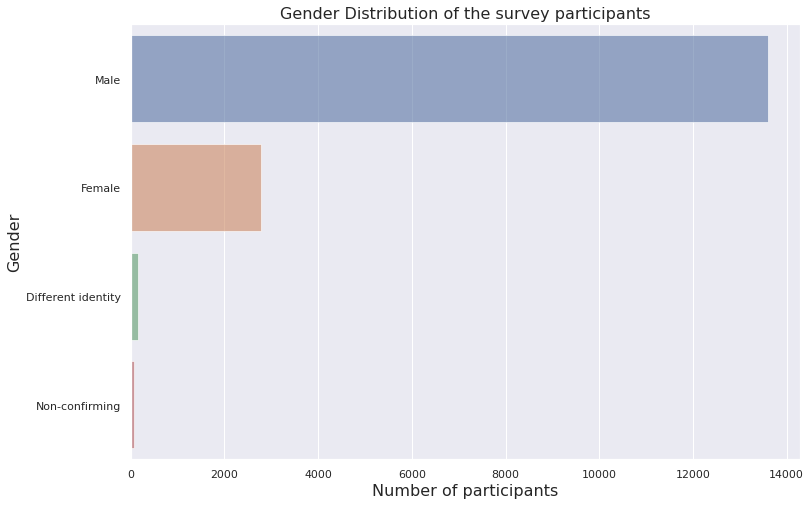

Proportion of women in this surve: 16.71%
Proportion of men in this surve: 81.88%


In [5]:
plt.figure(figsize=(12, 8))
genders = data['GenderSelect'].value_counts()
sns.barplot(y=genders.index, x=genders.values, alpha=0.6)
plt.yticks(range(len(data['GenderSelect'].value_counts().index)), ['Male', 'Female','Different identity','Non-confirming'])
plt.title('Gender Distribution of the survey participants', fontsize=16)
plt.xlabel('Number of participants', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show();
print('Proportion of women in this surve: {:0.2f}%'.format(100*len(data[data['GenderSelect']=='Female'])/len(data['GenderSelect'].dropna())))
print('Proportion of men in this surve: {:0.2f}%'.format(100*len(data[data['GenderSelect']=='Male'])/len(data['GenderSelect'].dropna())))

- 남성 응답자가 여성의 5배나 많음

In [6]:
print('{} instances seem to be too old (>65 years old)'.format(len(data[data['Age']>65])))
print('{} instances seem to be too young (<15 years old)'.format(len(data[data['Age']<15])))

154 instances seem to be too old (>65 years old)
35 instances seem to be too young (<15 years old)


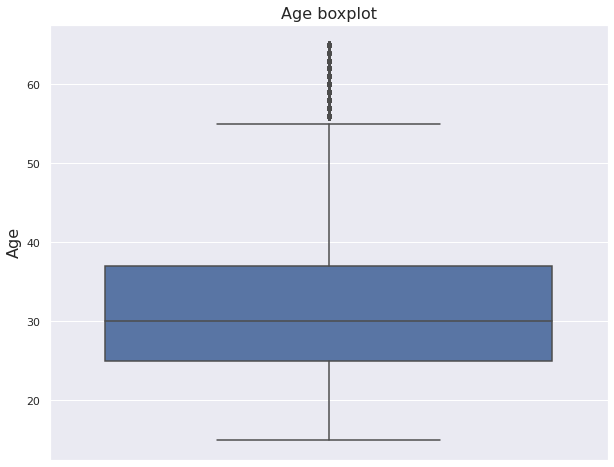

In [7]:
age = data[(data['Age']>=15) & (data['Age']<=65)]
plt.figure(figsize=(10, 8))
sns.boxplot(y=age['Age'], data=age)
plt.title('Age boxplot', fontsize=16)
plt.ylabel('Age', fontsize=16)
plt.show()

- 나이의 중앙값은 30살이며, 대부분 25-37세에 모여있음

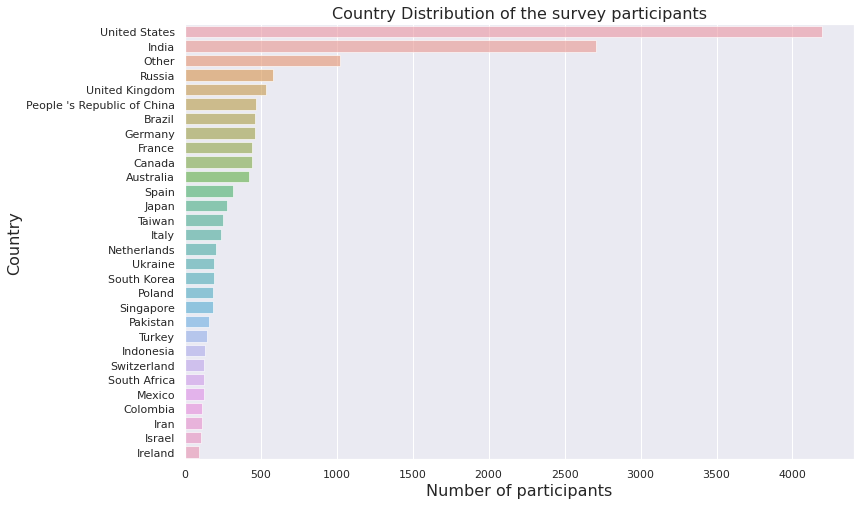

In [8]:
plt.figure(figsize=(12, 8))
countries = data['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title('Country Distribution of the survey participants', fontsize=16)
plt.xlabel('Number of participants', fontsize=16)
plt.ylabel('Country',  fontsize=16)
plt.show();

In [9]:
print('{:0.2f}% of the instances are Americans'.format(100*len(data[data['Country']=='United States'])/len(data)))
print('{:0.2f}% of the instances are Indians'.format(100*len(data[data['Country']=='India'])/len(data)))

25.11% of the instances are Americans
16.18% of the instances are Indians


- 응답의 총 41.29%가 미국과 인도
- 전 세계에서 가장 활발한 데이터 사이언스 커뮤니티가 있는 두 나라 (Kaggle, Analytics Vidhya)

## Formal education and Major

In [10]:
edu = data['FormalEducation'].value_counts()
labels = (np.array(edu.index))
values = (np.array((edu / edu.sum())*100))

trace = go.Pie(labels=labels, values=values, hoverinfo='label+percent', textfont=dict(size=20), showlegend=False)
layout = go.Layout(title='Formal Education of the survey participants')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Formal_Education')
fig.show(renderer="colab")

- 거의 절반의 캐글러는 석사 졸업생이고, 80.34%는 최소 학사 졸업생

In [11]:
data['MajorSelect'] = data['MajorSelect'].replace('Information technology, networking, or system administration','Information tech / System admin')

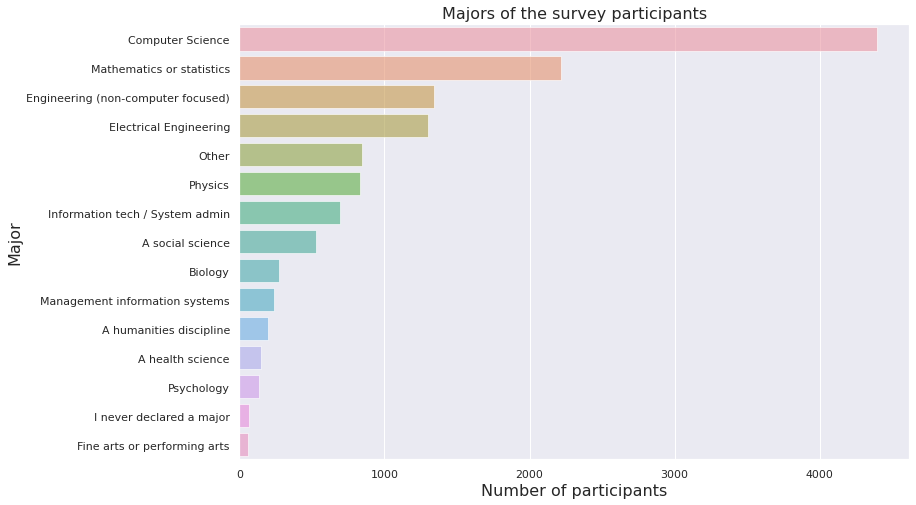

In [12]:
plt.figure(figsize=(12, 8))
majors = data['MajorSelect'].value_counts()
sns.barplot(y=majors.index, x=majors.values, alpha=0.6)
plt.title("Majors of the survey participants", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Major", fontsize=16)
plt.show();

- CS가 수학과보다 거의 2배

## How did you start learning Data Science?

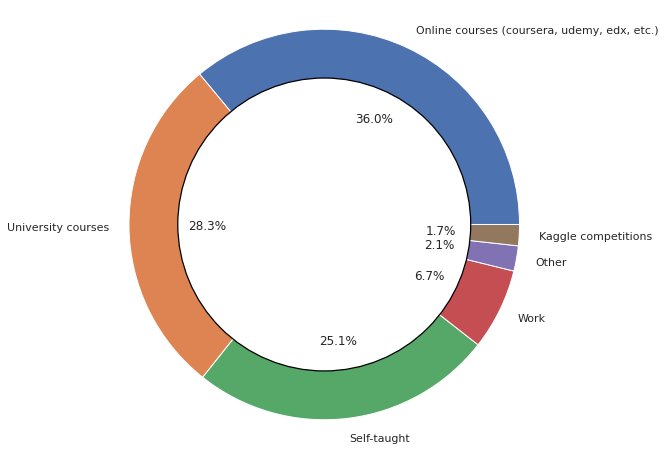

In [13]:
plt.figure(figsize=(10, 8))

temp = data['FirstTrainingSelect'].value_counts()
labels = temp.index
sizes = temp.values

plt.pie(sizes, labels=labels, autopct='%1.1f%%')

centre_circle = plt.Circle((0, 0), 0.75, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show();

- 많은 사람들이 온라인 코스로 데이터 사이언스를 시작

##Employment status

In [14]:
data['EmploymentStatus'] = data['EmploymentStatus'].replace('Independent contractor, freelancer, or self-employed','Independent')

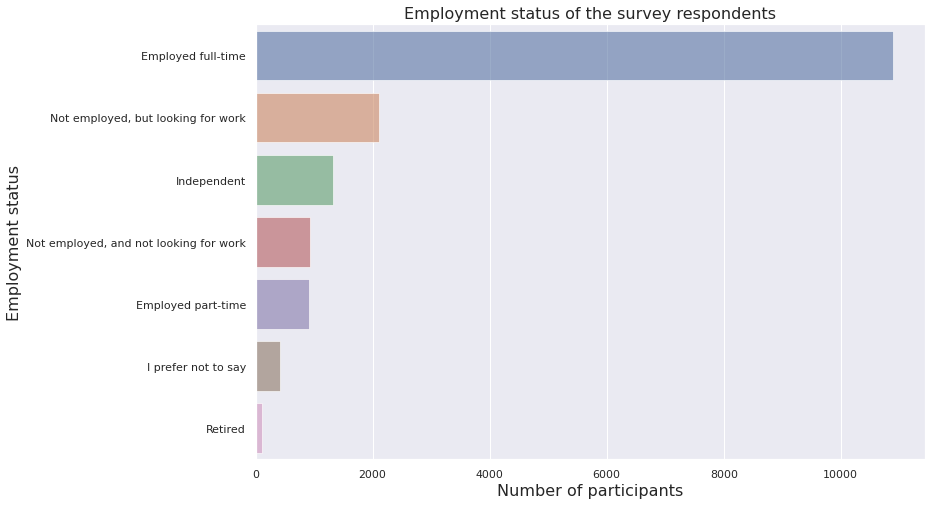

In [15]:
plt.figure(figsize=(12, 8))
status = data['EmploymentStatus'].value_counts()
sns.barplot(y=status.index, x=status.values, alpha=0.6)
plt.title("Employment status of the survey respondents", fontsize=16)
plt.xlabel("Number of participants", fontsize=16)
plt.ylabel("Employment status", fontsize=16)
plt.show();

In [16]:
print('{:0.2f}% of the instances are employed full-time'.format(100*len(data[data['EmploymentStatus']=='Employed full-time'])/len(data)))
status = ['Employed full-time','Independent','Employed part-time']
print('{:0.2f}% of the instances are employed'.format(100*len(data[data.EmploymentStatus.isin(status)])/len(data)))

65.19% of the instances are employed full-time
78.63% of the instances are employed


- 대부분 풀타임으로 근무 중
- 숨겨진 프리랜서 근무자도 많을 것으로 추측됨

## Would you like to work in Data Science?

"Are you actively looking to switch careers to data science?"라는 질문에는 3,012명 밖에 응답하지 않음
- 이미 데이터사이언티스트로 일하고 있거나, 여전히 학생일 것

In [17]:
car = data['CareerSwitcher'].value_counts()
labels = (np.array(car.index))
proportions = (np.array((car/car.sum())*100))
colors = ['#FEBFB3', '#E1396C']

trace = go.Pie(labels=labels, values=proportions, hoverinfo='label+percent', marker=dict(colors=colors, line=dict(color='#000000', width=2)))

layout = go.Layout(title='Working people looking to switch careers to data science')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Career_Switcher')
fig.show(renderer="colab")

- 데이터 사이언티스트로 아직 일하지 않는 대부분의 캐글러들은 직업을 바꾸고 싶어함
- 이 질문에는 추가 질문이 있었음
- 다음에는 이 질문에 전직을 하고 싶지 않아하는 응답자들의 응답을 살펴보자

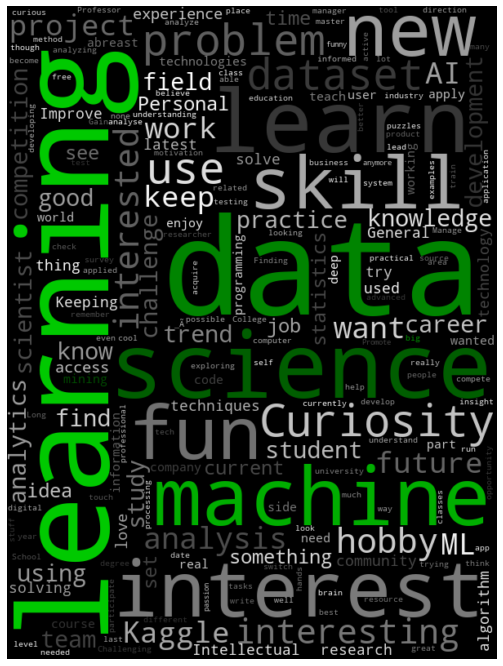

In [18]:
from wordcloud import (WordCloud, get_single_color_func)

#PS : Credits to Andreas Mueller, creator of wordcloud, for the following code of the class 'GroupedColorFunc'.
#He made the code fully public for people who want to use specific color for specific words and made an example.
#Source link : https://amueller.github.io/word_cloud/auto_examples/colored_by_group.html#sphx-glr-auto-examples-colored-by-group-py

class GroupedColorFunc(object):

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)


#############################################################
# Get text data from the freeform
text = freeForm[pd.notnull(freeForm["KaggleMotivationFreeForm"])]["KaggleMotivationFreeForm"]

wc = WordCloud(collocations=False,height=800, width=600,  relative_scaling=0.2,random_state=74364).generate(" ".join(text))

color_to_words = {
    # words below will be colored with a green single color function
    '#00ff00': ['data', 'science', 'mining', 'big',
                'bigdata', 'machine', 'learning']
}

# Words that are not in any of the color_to_words values will be colored with grey
default_color = 'grey'

# Create a color function with multiple tones
grouped_color_func = GroupedColorFunc(color_to_words, default_color)

# Apply our color function
wc.recolor(color_func=grouped_color_func)

# Plot
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

모든 단어가 어떻게 연결되어 있는지 확인
- 호기심과 흥미 : 머신러닝에 대한 흥미
- 취미와 재미 : 일이 아닌 재미를 위해 대회 참가
- 도전, 프로젝트와 경쟁 : 캐글은 도전을 위한 좋은 플랫폼

#2. Python vs R : Let the battle begin!

- 직업을 가진 응답자만 사용

In [19]:
t2 = data[['WorkToolsFrequencyR', 'WorkToolsFrequencyPython']].fillna(0)
t2.replace(['Rarely','Sometimes','Often','Most of the time'], [1,2,3,4], inplace=True)
t2['PythonVsR'] = ['R' if (freq1 > 2 and freq1 > freq2) else 
                   'Python' if (freq1 < freq2 and freq2 > 2) else
                   'Both' if (freq1==freq2 and freq1 > 2) else
                   'None' for (freq1, freq2) in zip(t2['WorkToolsFrequencyR'], t2['WorkToolsFrequencyPython'])]
data['PythonVsR'] = t2['PythonVsR']

df = data[data['PythonVsR']!='None']
print('Python users: ', len(df[df['PythonVsR']=='Python']))
print('R users: ', len(df[df['PythonVsR']=='R']))
print("Python+R users: ",len(df[df['PythonVsR']=='Both']))

Python users:  3438
R users:  1851
Python+R users:  878


- Python 사용자가 R 사용자에 비해 2배정도 많음

## R and Python across the world

In [20]:
test = df[['Country', 'PythonVsR']]
test['agg'] = np.ones(test.shape[0]) ##1로 채운 array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
%%HTML
<div class='tableauPlaceholder' id='viz1510841993802' style='position: relative'><noscript><a href='#'><img alt='Proportions of Python and R coders by country ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ka&#47;kaggle_kernel_final&#47;Feuille1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='kaggle_kernel_final&#47;Feuille1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;ka&#47;kaggle_kernel_final&#47;Feuille1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1510841993802');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [22]:
df['Country'].fillna('Missing', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [23]:
d_country = {}
for country in df['Country'].unique(): #modify to unique values
  maskp = (df['Country'] == country) & (df['PythonVsR'] == 'Python')
  maskr = (df['Country'] == country) & (df['PythonVsR'] == 'R')
  maskb = (df['Country'] == country) & (df['PythonVsR'] == 'Both')
  d_country[country] = {'Python':100*len(df[maskp])/len(df[df['Country'] == country]),
                        'R':100*len(df[maskr])/len(df[df['Country'] == country]),
                        'Both':100*len(df[maskb])/len(df[df['Country'] == country])}
pd.DataFrame(d_country).transpose()

print('Table with percentage of use for each country')
print(pd.DataFrame(d_country).transpose().head(10).round(2))

Table with percentage of use for each country
                Python      R   Both
Brazil           55.93  24.29  19.77
Russia           83.02  14.15   2.83
India            45.79  33.71  20.51
Taiwan           68.75  16.25  15.00
United States    54.99  30.32  14.70
Czech Republic   62.86  25.71  11.43
Colombia         25.49  50.98  23.53
Germany          60.00  31.56   8.44
Denmark          43.59  35.90  20.51
Poland           50.00  41.18   8.82


- 어떤 국가들은 여전히 R을 사용
- 하지만 대부분의 나라는 Python을 더 많이 사용

## ML methods / algorithms and skills for R and Python

In [24]:
df['WorkMethodsSelect'] = df['WorkMethodsSelect'].fillna('None')
techniques = ['Bayesian Techniques','Data Visualization', 'Logistic Regression','Natural Language Processing',
 'kNN and Other Clustering','Neural Networks','PCA and Dimensionality Reduction',
 'Time Series Analysis', 'Text Analytics','Cross-Validation']

df['WorkAlgorithmsSelect'] = df['WorkAlgorithmsSelect'].fillna('None')
algorithms = ['Bayesian Techniques','Decision Trees','Random Forests','Regression/Logistic Regression',
 'CNNs', 'RNNs', 'Gradient Boosted Machines','SVMs','GANs','Ensemble Methods']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



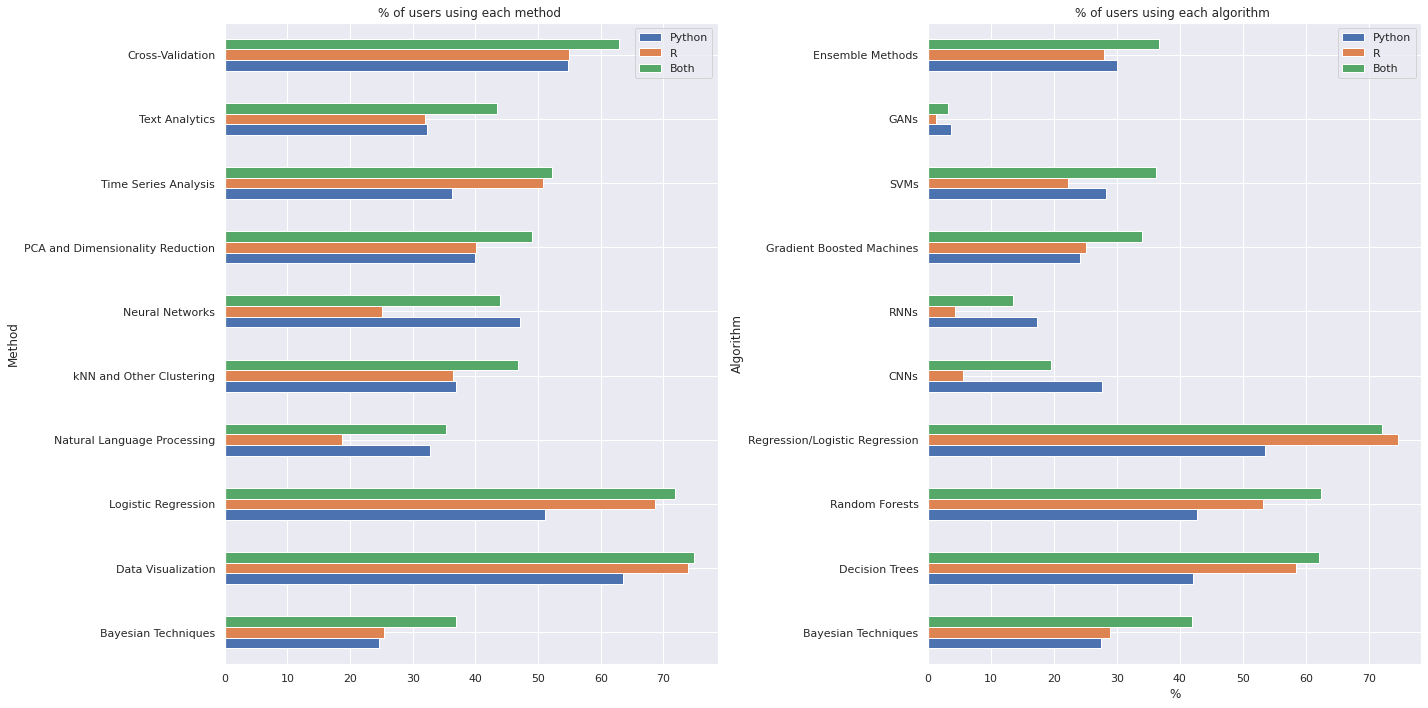

In [25]:
d = {}
for technique in techniques:
  d[technique] = {'Python':0, 'R':0, 'Both':0}
  for (i, elem) in zip(range(df.shape[0]), df['WorkMethodsSelect']):
    if technique in elem:
      d[technique][df['PythonVsR'].iloc[i]]+=1
  d[technique]['Python'] = 100*d[technique]['Python']/len(df[df['PythonVsR']=='Python'])
  d[technique]['R'] = 100*d[technique]['R']/len(df[df['PythonVsR']=='R'])
  d[technique]['Both'] = 100*d[technique]['Both']/len(df[df['PythonVsR']=='Both'])

d_algo = {}
for algo in algorithms:
  d_algo[algo] = {'Python':0, 'R':0, 'Both':0}
  for (i, elem) in zip(range(df.shape[0]), df['WorkAlgorithmsSelect']):
    if algo in elem:
      d_algo[algo][df['PythonVsR'].iloc[i]]+=1
  d_algo[algo]['Python']=100*d_algo[algo]['Python']/len(df[df['PythonVsR']=='Python'])
  d_algo[algo]['R']=100*d_algo[algo]['R']/len(df[df['PythonVsR']=='R'])
  d_algo[algo]['Both']=100*d_algo[algo]['Both']/len(df[df['PythonVsR']=='Both'])

f, ax = plt.subplots(1, 2, figsize=(20, 10))
(pd.DataFrame(d)).transpose().plot(kind='barh', ax=ax[0])
ax[0].set_title("% of users using each method ")
ax[0].set_xlabel('')
ax[0].set_ylabel("Method")

(pd.DataFrame(d_algo)).transpose().plot(kind='barh',ax=ax[1])
ax[1].set_title("% of users using each algorithm ")
ax[1].set_xlabel('%')
ax[1].set_ylabel("Algorithm")

plt.tight_layout()
plt.show();

- 매우 관련있는 두가지 질문으로 직장에서 어떤 알고리즘과 방법을 사용하는지 탐색
- 신경망을 제외한 주어진 방법과 알고리즘의 경우 두가지 방법을 다 사용하는 사람이 R만 사용하는 사람보다 많음
- 신경망 관련은 아직 많이 사용하지 않는 알고리즘

In [26]:
df['MLSkillsSelect'].fillna('None', inplace=True)
skills = ['Natural Language Processing', 'Computer Vision', 'Adversarial Learning',
          'Supervised Machine Learning (Tabular Data)', 'Reinforcement learning',
          'Unsupervised Learning', 'Outlier detection (e.g. Fraud detection)',
          'Time Series', 'Recommendation Engines']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



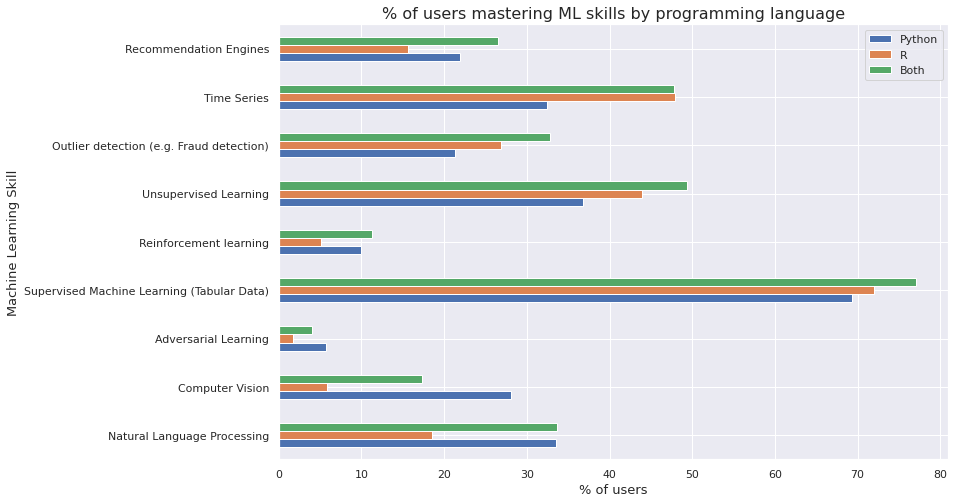

In [27]:
d_skills = {}
for skill in skills : 
    d_skills[skill] = {'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df.shape[0]),df['MLSkillsSelect']):
        if skill in elem : 
            d_skills[skill][df['PythonVsR'].iloc[i]]+=1
    d_skills[skill]['Python'] = 100*d_skills[skill]['Python']/len(df[df['PythonVsR']=='Python'])
    d_skills[skill]['R'] = 100*d_skills[skill]['R']/len(df[df['PythonVsR']=='R'])
    d_skills[skill]['Both'] = 100*d_skills[skill]['Both']/len(df[df['PythonVsR']=='Both'])
    
(pd.DataFrame(d_skills)).transpose().plot(kind='barh',figsize=(12,8))
plt.ylabel("Machine Learning Skill", fontsize=13)
plt.xlabel("% of users", fontsize=13)
plt.title("% of users mastering ML skills by programming language", fontsize=16)
plt.show();

- 많은 비율의 R 코더는 비지도학습, 이상치 감지, 시계열 분석 및 지도학습에 능숙
- 강화학습, NLP, 컴퓨터 비전과 같은 새로운 분야에는 파이썬이 훨씬 앞섬

In [28]:
df['WorkDataTypeSelect'].fillna('None',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



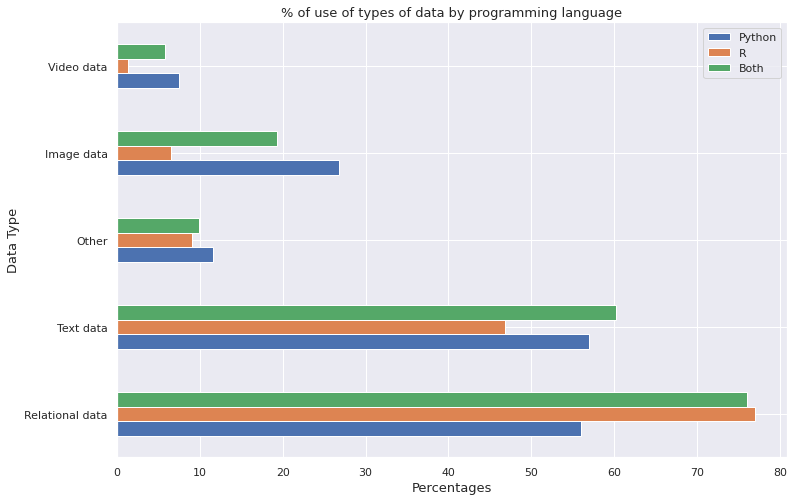

In [29]:
data_type = ['Relational data', 'Text data', 'Other',
             'Image data', 'Image data', 'Video data']
d_data = {}
for dtype in data_type :
    d_data[dtype] = {'Python':0,'R':0,'Both':0}
    for (i,elem) in zip(range(df.shape[0]),df['WorkDataTypeSelect']):
        if dtype in elem : 
            d_data[dtype][df['PythonVsR'].iloc[i]]+=1
    d_data[dtype]['Python'] = 100*d_data[dtype]['Python']/len(df[df['PythonVsR']=='Python'])
    d_data[dtype]['R'] = 100*d_data[dtype]['R']/len(df[df['PythonVsR']=='R'])
    d_data[dtype]['Both'] = 100*d_data[dtype]['Both']/len(df[df['PythonVsR']=='Both'])
    
(pd.DataFrame(d_data)).transpose().plot(kind='barh',figsize=(12,8))
plt.ylabel("Data Type", fontsize=13)
plt.xlabel("Percentages", fontsize=13)
plt.title("% of use of types of data by programming language", fontsize=13)
plt.show();             

- 27% Python user는 이미지를, 60%는 문자 데이터를 다루는 반면 7% R user는 이미지를 다루고, 47%는 문자 데이터를 다룸
- 반대로 R user의 78%는 관계형 데이터를 다룸
- Python user가 다재다능!

## Industry and Job title

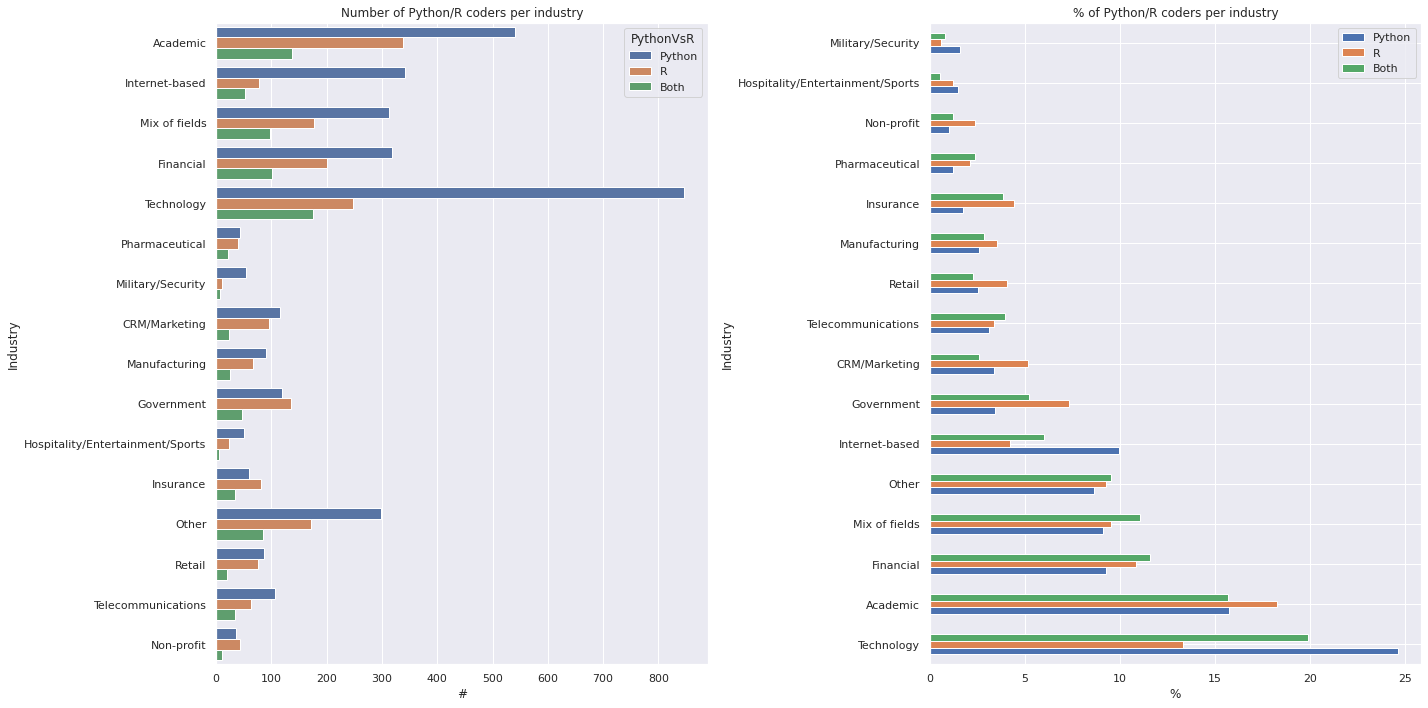

In [30]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.countplot(y='EmployerIndustry', hue='PythonVsR', data=df, ax=ax[0])
ax[0].set_title("Number of Python/R coders per industry")
ax[0].set_xlabel('#')
ax[0].set_ylabel("Industry")

d_ind = {}
for value in df['PythonVsR'].value_counts().index : 
    temp = df[df['PythonVsR']==value]
    d_ind[value] = {}
    for industry in df['EmployerIndustry'].value_counts().index :
        d_ind[value][industry]=100*len(temp[temp['EmployerIndustry']==industry])/len(temp)

(pd.DataFrame(d_ind)).plot(kind='barh',ax=ax[1])
ax[1].set_title('% of Python/R coders per industry')
ax[1].set_xlabel('%')
ax[1].set_ylabel("Industry")

plt.tight_layout()
plt.show();

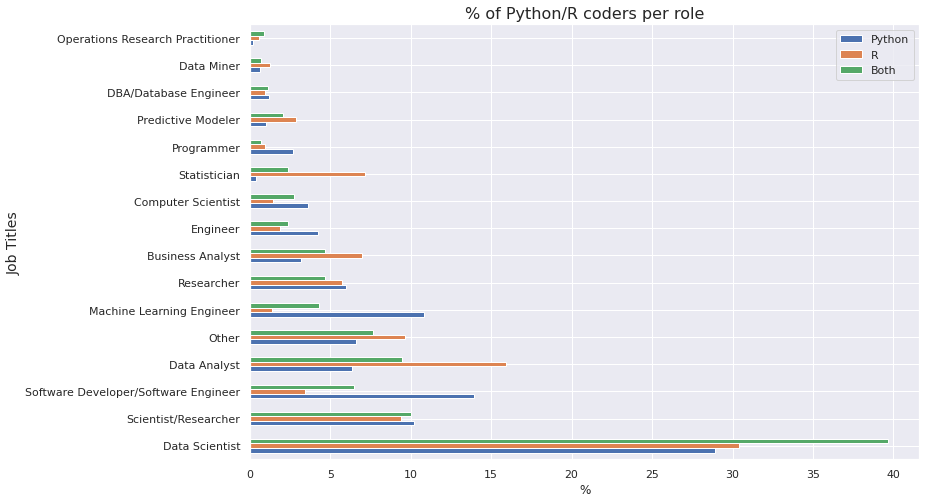

In [32]:
d_title = {}
for value in df['PythonVsR'].value_counts().index:
  temp = df[df['PythonVsR'] == value]
  d_title[value] = {}
  for title in df['CurrentJobTitleSelect'].value_counts().index:
    d_title[value][title] = 100*len(temp[temp['CurrentJobTitleSelect'] == title])/len(temp)

ax = (pd.DataFrame(d_title)).plot(kind='barh', figsize=(12, 8))
ax.set_title('% of Python/R coders per role',fontsize=16)
ax.set_xlabel('%')
ax.set_ylabel("Job Titles",fontsize=14)

plt.show();

- R과 Python 모두 다 사용하는 코더는 데이터 사이언티스트가 대부분
- 25%의 Python 코더는 소프트웨어 엔지니어거나 머신러닝 엔지니어이고, 30%의 R코더는 통계학, 데이터 분석, 비지니스 애널리스트

In [33]:
from scipy.stats import chi2_contingency

conti = pd.crosstab(data['MajorSelect'], data['CurrentJobTitleSelect'])
conti

CurrentJobTitleSelect,Business Analyst,Computer Scientist,DBA/Database Engineer,Data Analyst,Data Miner,Data Scientist,Engineer,Machine Learning Engineer,Operations Research Practitioner,Other,Predictive Modeler,Programmer,Researcher,Scientist/Researcher,Software Developer/Software Engineer,Statistician
MajorSelect,,,,,,,,,,,,,,,,
A health science,10,4,2,13,1,18,1,4,1,17,1,5,9,26,6,2
A humanities discipline,11,3,3,33,4,29,3,6,0,28,2,5,13,16,15,5
A social science,38,1,2,89,5,137,4,5,5,50,11,6,51,37,17,11
Biology,8,1,1,19,2,69,5,5,0,18,1,3,9,73,14,9
Computer Science,105,206,70,238,27,530,101,262,4,254,23,187,176,186,859,11
Electrical Engineering,49,22,14,69,9,176,131,82,4,81,13,24,83,82,191,5
Engineering (non-computer focused),105,11,19,73,7,236,140,45,9,118,21,24,45,89,105,13
Fine arts or performing arts,5,1,0,4,0,5,1,1,0,13,0,3,7,1,8,0
I never declared a major,3,0,0,7,0,7,3,2,0,6,0,0,2,2,13,1


- 완전히 정확하게 말하자면, 가설 중 하나는 모든 값이 5보다 커야 하기 때문에 카이제곱 검정을 적용할 수 없음 > 심리학 전공의 컴퓨터 과학자는 0명
- 하지만 수행하는 방법을 알기 위해 시도

In [34]:
p_value = chi2_contingency(conti, lambda_='log-likelihood')[1]
p_value

0.0

- 전공과 현재 직업 두 변수는 독립적이지 않다. 귀무가설 기각

## Main function and percentage of time for specific tasks

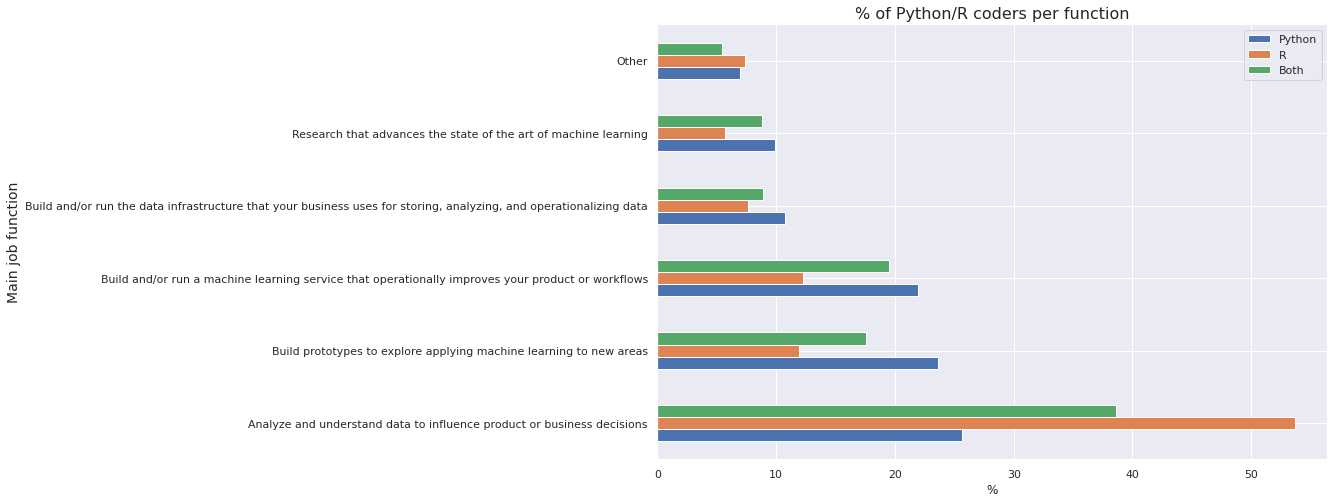

In [35]:
d_title = {}
for value in df['PythonVsR'].value_counts().index : 
    temp = df[df['PythonVsR']==value]
    d_title[value] = {}
    for title in df['JobFunctionSelect'].value_counts().index :
        d_title[value][title]=100*len(temp[temp['JobFunctionSelect']==title])/len(temp)

ax = (pd.DataFrame(d_title)).plot(kind='barh',figsize=(12,8))
ax.set_title('% of Python/R coders per function',fontsize=16)
ax.set_xlabel('%')
ax.set_ylabel("Main job function",fontsize=14)

plt.show();

- R user의 대부분은 비지니스/데이터 분석가와 관련됨
- Python user는 전체적으로 모든 부분과 관련됨

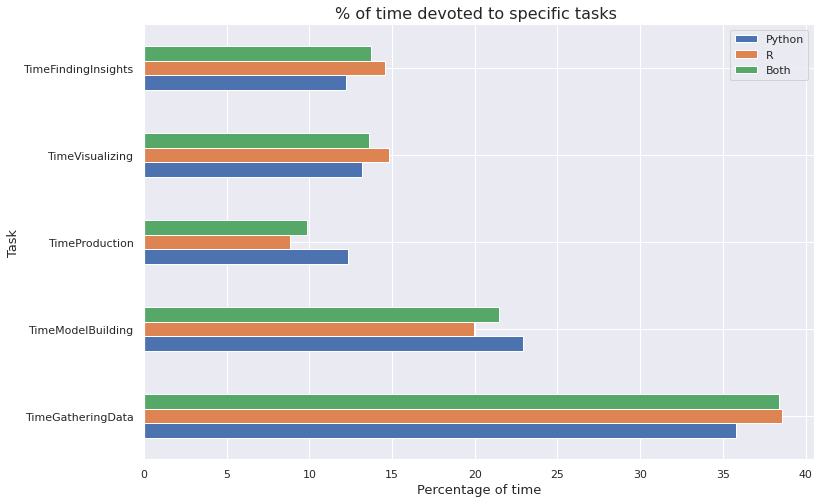

In [36]:
d_task = {}
tasks = ['TimeGatheringData','TimeModelBuilding','TimeProduction','TimeVisualizing','TimeFindingInsights']
for task in tasks:
  d_task[task] = {'Python':df[df['PythonVsR'] == 'Python'][task].mean(),
                  'R':df[df['PythonVsR'] == 'R'][task].mean(),
                  'Both':df[df['PythonVsR'] == 'Both'][task].mean()}
(pd.DataFrame(d_task)).transpose().plot(kind='barh', figsize=(12, 8))
plt.ylabel("Task", fontsize=13)
plt.xlabel("Percentage of time", fontsize=13)
plt.title("% of time devoted to specific tasks ", fontsize=16)
plt.show();

- 어떤 언어를 사용하는 유저에 상관없이 데이터를 수집하는 것에 가장 많은 시간을 투자하고, 다음으로 모델링에 많은 시간이 소요됨

In [37]:
df['WorkProductionFrequency'] = df['WorkProductionFrequency'].fillna("Don't know")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



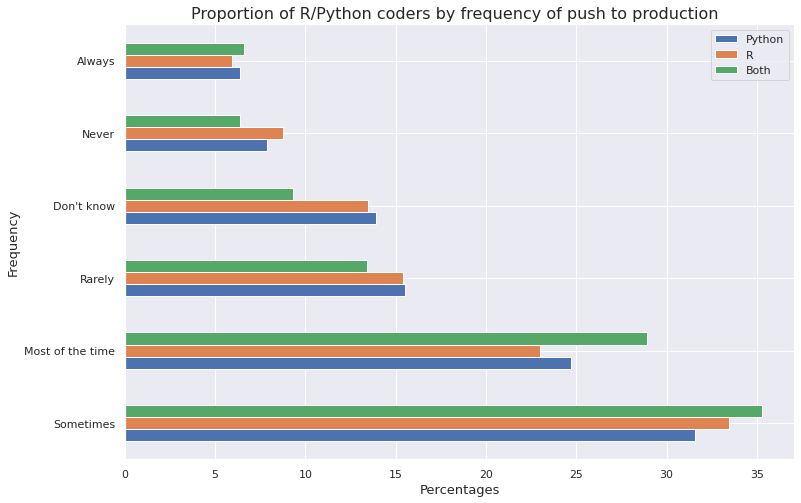

In [40]:
d_prod = {}
for value in df['PythonVsR'].value_counts().index:
  temp = df[df['PythonVsR']==value]
  d_prod[value] = {}
  for frequency in df['WorkProductionFrequency'].value_counts().index :
        d_prod[value][frequency] = 100*len(temp[temp['WorkProductionFrequency']==frequency])/len(temp)

(pd.DataFrame(d_prod)).plot(kind='barh',figsize=(12,8))
plt.ylabel("Frequency", fontsize=13)
plt.xlabel("Percentages", fontsize=13)
plt.title("Proportion of R/Python coders by frequency of push to production  ", fontsize=16)
plt.show();

- R 코더는 생산에 모델링 투입의 중요성이 감소되는 것처럼 보임

## Experience as code-writers

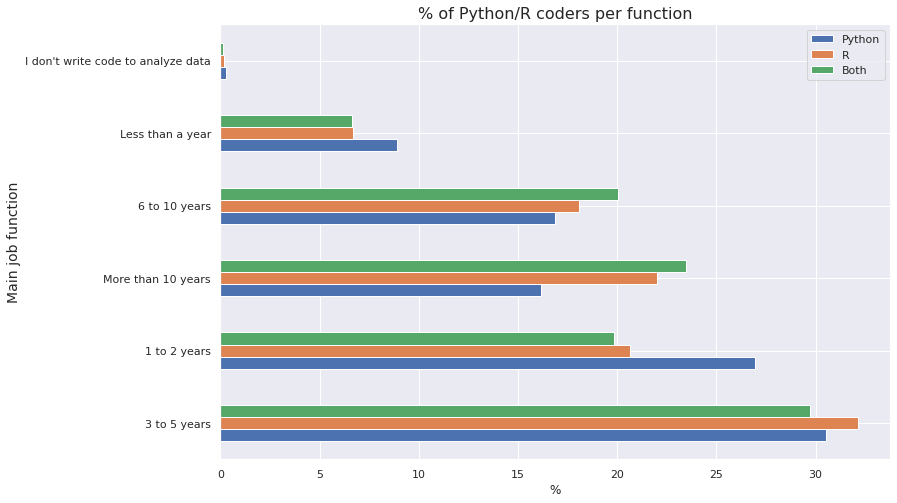

In [41]:
d_tenure = {}
for value in df['PythonVsR'].value_counts().index : 
    temp = df[df['PythonVsR']==value]
    d_tenure[value] = {}
    for dur in df['Tenure'].value_counts().index :
        d_tenure[value][dur]=100*len(temp[temp['Tenure']==dur])/len(temp)

ax = (pd.DataFrame(d_tenure)).plot(kind='barh',figsize=(12,8))
ax.set_title('% of Python/R coders per function',fontsize=16)
ax.set_xlabel('%')
ax.set_ylabel("Main job function",fontsize=14)

plt.show();

- 두 언어 모두 3-5년의 코딩 기간이 가장 많았음
- 파이썬은 최근 5년동안 많이 사용되는 언어임을 알 수 있음

## What language would you recommend for DS beginners

In [42]:
df['LanguageRecommendationSelect'].fillna('Other',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



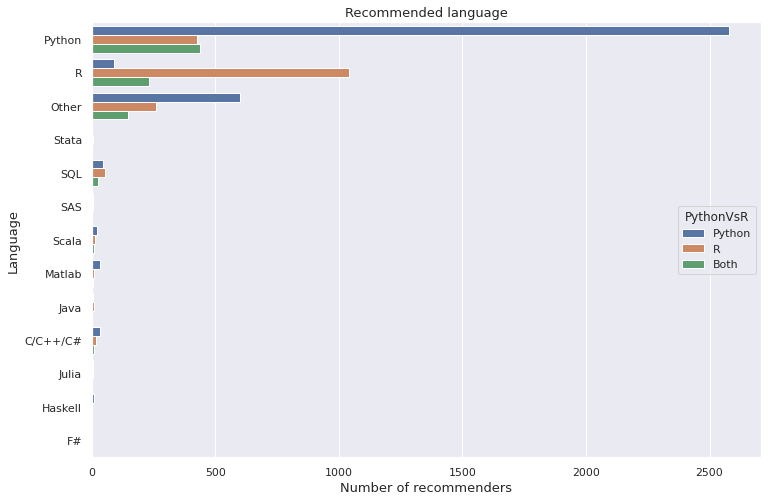

Proportion of Python users who recommend R as the first language to learn: 2.68%
Proportion of R users who recommend Python as the first language to learn: 23.12%


In [43]:
plt.figure(figsize=(12, 8))
sns.countplot(y='LanguageRecommendationSelect', hue='PythonVsR', data=df)
plt.ylabel("Language", fontsize=13)
plt.xlabel("Number of recommenders", fontsize=13)
plt.title("Recommended language", fontsize=13)
plt.show();

mask1 = (df['LanguageRecommendationSelect'] == 'R') & (df['PythonVsR'] == 'Python')
print('Proportion of Python users who recommend R as the first language to learn: {:0.2f}%'.format(100*len(df[mask1])/len(df[df['PythonVsR']=='Python'])))
mask1=(df['LanguageRecommendationSelect'] == 'Python')& (df['PythonVsR']=='R')
print('Proportion of R users who recommend Python as the first language to learn: {:0.2f}%'.format(100*len(df[mask1])/len(df[df['PythonVsR']=='R'])))

- R 유저들이 python 추천을 더 많이 함

# US working Kagglers : Annual income analysis

In [44]:
demographic_features = ['GenderSelect','Country','Age',
                        'FormalEducation','MajorSelect','ParentsEducation',
                        'EmploymentStatus', 'CurrentJobTitleSelect',
                        'DataScienceIdentitySelect','CodeWriter',
                        'CurrentEmployerType','JobFunctionSelect',
                        'SalaryChange','RemoteWork','WorkMLTeamSeatSelect',
                        'Tenure','EmployerIndustry','EmployerSize','PythonVsR',
                        'CompensationAmount']

data_dem = data[demographic_features]
data_dem.head(5)

,GenderSelect,Country,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Bachelor's degree,Management information systems,A doctoral degree,Employed full-time,DBA/Database Engineer,Yes,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I am not currently employed,Always,Standalone Team,More than 10 years,Internet-based,100 to 499 employees,None,NaN
1,Female,United States,30.0,Master's degree,Computer Science,A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Less than a year,NaN,NaN,None,NaN
2,Male,Canada,28.0,Master's degree,Engineering (non-computer focused),A bachelor's degree,"Not employed, but looking for work",NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,3 to 5 years,NaN,NaN,None,NaN
3,Male,United States,56.0,Master's degree,Mathematics or statistics,High school,Independent,Operations Research Practitioner,Yes,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased 20% or more,NaN,Standalone Team,More than 10 years,Mix of fields,NaN,None,"250,000"
4,Male,Taiwan,38.0,Doctoral degree,Engineering (non-computer focused),Primary/elementary school,Employed full-time,Computer Scientist,No,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,I do not want to share information about my sa...,Rarely,Business Department,More than 10 years,Technology,"5,000 to 9,999 employees",None,NaN


## American Kagglers annual income

In [47]:
# Convert all salaries to floats
data_dem['CompensationAmount'] = data_dem['CompensationAmount'].fillna(0)
data_dem['CompensationAmount'] = data_dem['CompensationAmount'].apply(lambda x: 0 if (pd.isnull(x) or (x=='-') or (x==0))
                                                       else float(x.replace(',','')))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



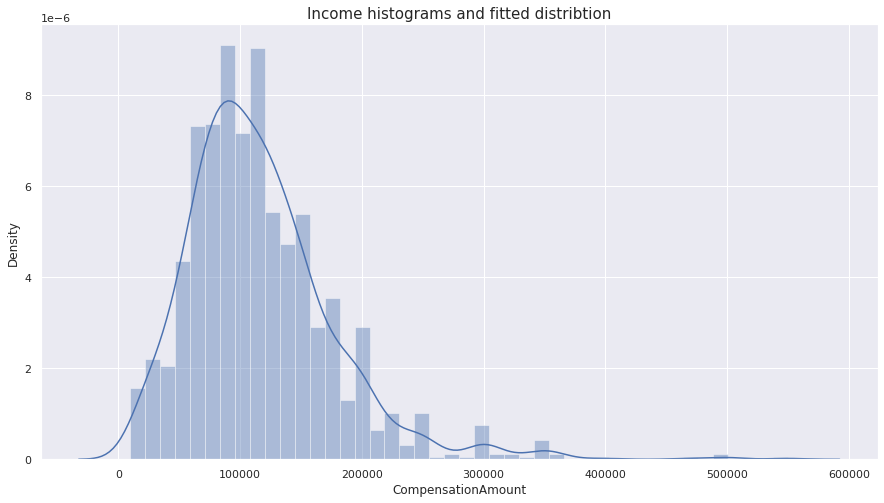

In [48]:
# Remove Outliers
data_dem = data_dem[(data_dem['CompensationAmount']>5000) &(data_dem['CompensationAmount']<1000000)]
data_dem = data_dem[data_dem['Country']=='United States']

plt.subplots(figsize=(15,8))
sns.distplot(data_dem['CompensationAmount'])
plt.title('Income histograms and fitted distribtion',size=15)
plt.show();

In [49]:
print('The median salary for US data scientist: {} USD'.format(data_dem['CompensationAmount'].median()
))
print('The mean salary for US data scientist: {:0.2f} USD'.format(data_dem['CompensationAmount'].mean()
))

The median salary for US data scientist: 107000.0 USD
The mean salary for US data scientist: 116649.99 USD


- 대부분의 급여는 50k에서 140k 사이에 몰려있고, Glassdoor에 따르면 데이터 사이언티스트의 평균연봉은 128k라고 하니까 응답 결과 또한 비슷함


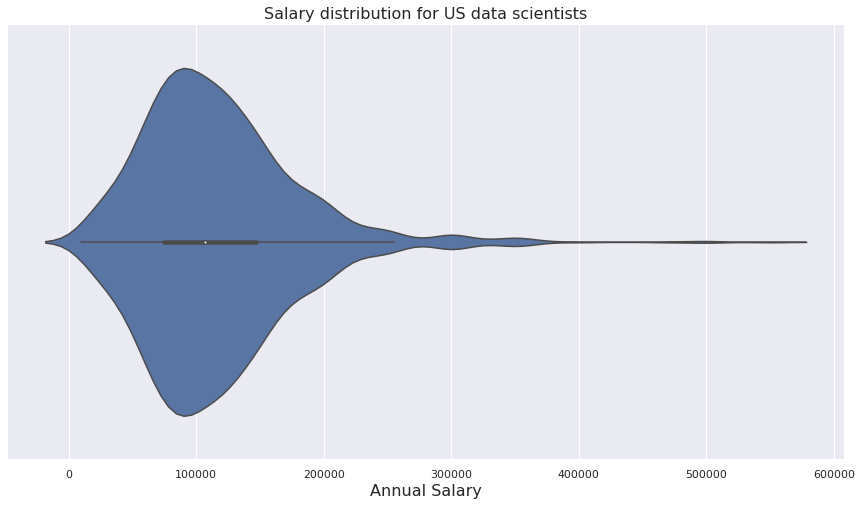

In [51]:
plt.figure(figsize=(15, 8))
sns.violinplot(x='CompensationAmount', data=data_dem)
plt.title("Salary distribution for US data scientists", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.show();

## Salary VS Gender

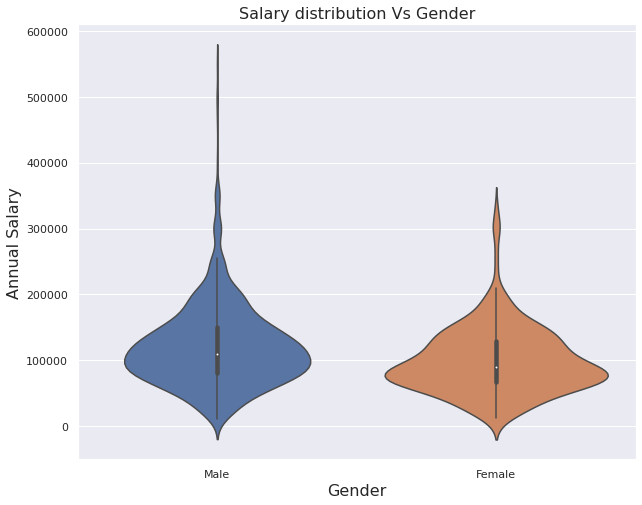

In [52]:
temp = data_dem[data_dem.GenderSelect.isin(['Male', 'Female'])]
plt.figure(figsize=(10, 8))
sns.violinplot(y='CompensationAmount', x='GenderSelect', data=temp)
plt.title("Salary distribution Vs Gender", fontsize=16)
plt.ylabel("Annual Salary", fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.show();

- 큰 차이는 없지만 남성이 조금 더 많은 급여를 받고 있고, 여성에는 400000 이상의 이상치가 없음

## Salary VS Formal Education

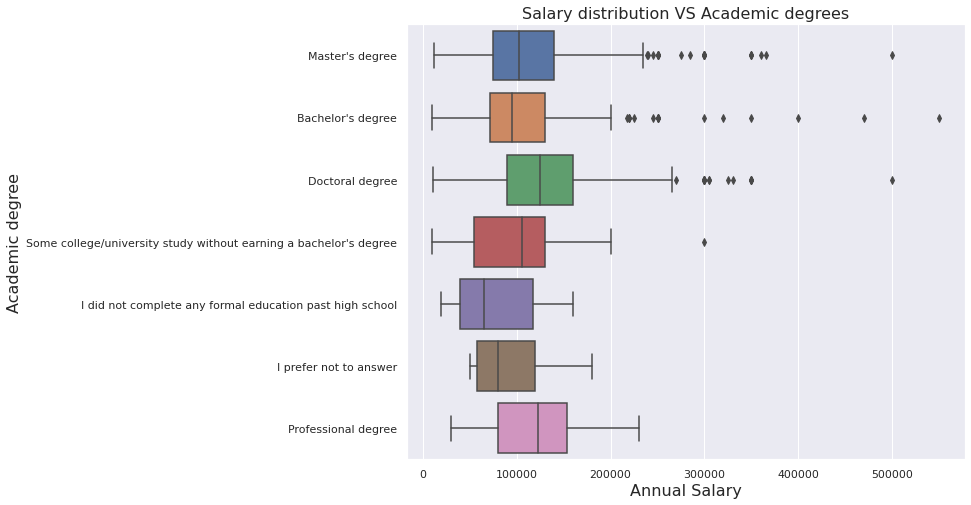

In [53]:
titles = list(data_dem['FormalEducation'].value_counts().index)
temp = data_dem[data_dem.FormalEducation.isin(titles)]
plt.figure(figsize=(10,8))
sns.boxplot( x='CompensationAmount', y='FormalEducation',data=temp)
plt.title("Salary distribution VS Academic degrees", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Academic degree", fontsize=16)
plt.show();

- 중앙값만 확인해 보면 더 많은 교육을 받을수록, 연봉의 중앙값이 높음


## Salary VS Job Title

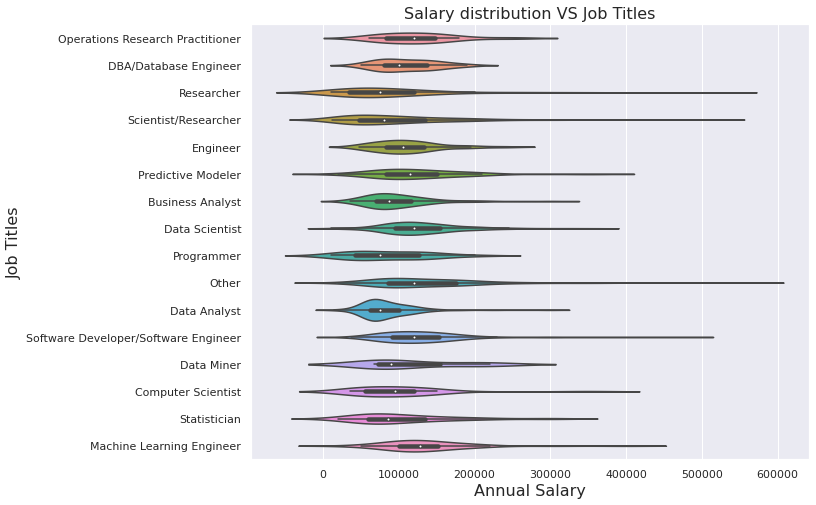

In [54]:
titles = list(data_dem['CurrentJobTitleSelect'].value_counts().index)
temp = data_dem[data_dem.CurrentJobTitleSelect.isin(titles)]
plt.figure(figsize=(10, 8))
sns.violinplot(x='CompensationAmount', y='CurrentJobTitleSelect', data=temp)
plt.title("Salary distribution VS Job Titles", fontsize=16)
plt.xlabel("Annual Salary", fontsize=16)
plt.ylabel("Job Titles", fontsize=16)
plt.show();

- ML 엔지니어나 데이터 사이언티스트가 데이터 애널리스트, 비지니스 애널리스트 등 보다 연봉이 높음

## Dimensionality reduction and 2D-plotting

- 차원축소를 위해 사용되는 PCA는 숫자형/연속형 변수에만 사용 가능
- 다중 대응 분석(MCA)는 범주형 데이터의 차원축소를 위해 사용 > 카이제곱 검정 사용

In [55]:
data_dem['CompensationAmount'] = pd.cut(data_dem['CompensationAmount'], bins=[0,130000,1000000], 
                                        include_lowest=True, labels=[1, 2])
data_dem['Age'] = pd.cut(data_dem['Age'], bins=[0,18,25,30,35,40,50,60,100],
                           include_lowest=True,labels=[1,2,3,4,5,6,7,8])
data_dem.drop('Country', axis=1, inplace=True)

In [57]:
! pip install prince

In [66]:
import prince
np.random.seed(42)
mca = prince.MCA(data_viz, n_components=2, use_benzecri_rates=True)
mca.plot_rows(show_points=True, show_labels=False, color_by='CompensationAmount', ellipse_fill=True)

NameError: ignored

In [69]:
#projections=mca.row_principal_coordinates
#projections.columns=['ax1','ax2']
#projections['target']=y.iloc[length]

#msk_p = ((projections['ax1']>-0.70) & (projections['ax1']<-0.45 )) & ((projections['ax2']<0.66) &(projections['ax2']>0.50))
#samples_p=projections[msk_p]
#indexes_p = samples_p.index #[133, 247, 499, 576, 2375, 3578, 3606, 3876, 5758, 6059, 10155, 10514, 11552, 13438, 15631]
#ex_p=data_dem.loc[indexes_p]

ex_p=data_dem.loc[[133, 247, 499, 576, 2375, 3578, 3606, 3876, 5758, 6059, 10155, 10514, 11552, 13438, 15631]]
ex_p.head(10)

,GenderSelect,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
133,Male,2,Master's degree,Engineering (non-computer focused),NaN,Employed full-time,Business Analyst,Yes,Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,Has increased between 6% and 19%,NaN,Business Department,1 to 2 years,Retail,100 to 499 employees,R,1
247,Male,2,Bachelor's degree,Mathematics or statistics,A professional degree,Employed part-time,Business Analyst,Sort of (Explain more),Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,Has increased 20% or more,Rarely,IT Department,3 to 5 years,Manufacturing,"1,000 to 4,999 employees",R,1
499,Male,2,Bachelor's degree,Other,A master's degree,Employed full-time,Data Analyst,Yes,Yes,Employed by professional services/consulting firm,Analyze and understand data to influence produ...,I was not employed 3 years ago,Rarely,Business Department,1 to 2 years,Financial,"10,000 or more employees",R,1
576,Female,2,Bachelor's degree,Mathematics or statistics,A master's degree,Employed full-time,Data Analyst,Yes,Yes,Employed by a company that performs advanced a...,Analyze and understand data to influence produ...,I was not employed 3 years ago,Rarely,Standalone Team,1 to 2 years,Technology,100 to 499 employees,Python,1
2375,Female,2,Bachelor's degree,Other,A master's degree,Employed full-time,Business Analyst,Sort of (Explain more),Yes,Employed by professional services/consulting f...,Analyze and understand data to influence produ...,I was not employed 3 years ago,NaN,Standalone Team,1 to 2 years,Internet-based,"1,000 to 4,999 employees",Python,1
3578,Male,2,Bachelor's degree,Mathematics or statistics,A master's degree,Employed part-time,Data Scientist,NaN,Yes,Employed by a company that performs advanced a...,Analyze and understand data to influence produ...,Has increased 20% or more,Rarely,IT Department,1 to 2 years,Technology,"10,000 or more employees",R,1
3606,Female,4,Master's degree,A health science,A master's degree,Employed full-time,Data Analyst,No,Yes,Employed by non-profit or NGO,Build and/or run the data infrastructure that ...,Has increased between 6% and 19%,Sometimes,Standalone Team,1 to 2 years,Non-profit,100 to 499 employees,R,1
3876,Female,3,Master's degree,Psychology,A master's degree,Employed full-time,Business Analyst,Sort of (Explain more),Yes,"Employed by college or university,Employed by ...",Analyze and understand data to influence produ...,Has stayed about the same (has not increased o...,Sometimes,Other,3 to 5 years,Non-profit,500 to 999 employees,R,1
5758,Male,2,Bachelor's degree,Mathematics or statistics,A doctoral degree,Employed full-time,Data Analyst,No,Yes,Employed by a company that performs advanced a...,Analyze and understand data to influence produ...,I was not employed 3 years ago,Rarely,Standalone Team,1 to 2 years,Technology,500 to 999 employees,R,1
6059,Male,2,Bachelor's degree,A social science,A professional degree,Employed full-time,Data Analyst,No,Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,I was not employed 3 years ago,Sometimes,Standalone Team,1 to 2 years,Insurance,"1,000 to 4,999 employees",R,1


In [70]:
#msk_r = ((projections['ax1']>0.2) & (projections['ax1']<0.7 )) & ((projections['ax2']<-0.80) &(projections['ax2']>-1.10))
#samples_r=projections[msk_r]
#indexes_r = samples_r.index  #[445, 3273, 4751, 4803, 4960, 11071, 11528, 13663, 13880]
#ex_r = data_dem.loc[indexes_r]

indexes_r=[445, 3273, 4751, 4803, 4960, 11071, 11528, 13663, 13880]
ex_r = data_dem.loc[indexes_r]

ex_r


,GenderSelect,Age,FormalEducation,MajorSelect,ParentsEducation,EmploymentStatus,CurrentJobTitleSelect,DataScienceIdentitySelect,CodeWriter,CurrentEmployerType,JobFunctionSelect,SalaryChange,RemoteWork,WorkMLTeamSeatSelect,Tenure,EmployerIndustry,EmployerSize,PythonVsR,CompensationAmount
445,Male,6,Doctoral degree,Computer Science,"Some college/university study, no bachelor's d...",Independent,Data Scientist,NaN,Yes,Employed by professional services/consulting firm,Build prototypes to explore applying machine l...,Has stayed about the same (has not increased o...,Most of the time,IT Department,More than 10 years,Mix of fields,NaN,R,2
3273,Male,6,Some college/university study without earning ...,Computer Science,High school,Independent,Data Scientist,NaN,Yes,Self-employed,Other,Has stayed about the same (has not increased o...,Sometimes,Other,More than 10 years,Mix of fields,NaN,Both,2
4751,Male,7,Some college/university study without earning ...,Mathematics or statistics,A bachelor's degree,Independent,Software Developer/Software Engineer,No,Yes,Self-employed,Build prototypes to explore applying machine l...,Has stayed about the same (has not increased o...,Most of the time,Business Department,More than 10 years,Technology,NaN,Python,2
4803,Male,5,Doctoral degree,Physics,A bachelor's degree,Independent,Data Scientist,NaN,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased 20% or more,Most of the time,IT Department,More than 10 years,Other,NaN,R,2
4960,Male,8,Bachelor's degree,Other,A bachelor's degree,Independent,Data Scientist,NaN,Yes,Employed by a company that doesn't perform adv...,Analyze and understand data to influence produ...,Has increased 20% or more,Always,IT Department,More than 10 years,Other,NaN,Python,2
11071,Male,7,Master's degree,Mathematics or statistics,High school,Independent,Data Scientist,NaN,Yes,Self-employed,Build prototypes to explore applying machine l...,Has stayed about the same (has not increased o...,Most of the time,IT Department,More than 10 years,Other,NaN,None,2
11528,Male,7,Some college/university study without earning ...,Computer Science,"Some college/university study, no bachelor's d...",Independent,Data Scientist,NaN,Yes,Self-employed,Analyze and understand data to influence produ...,Has increased between 6% and 19%,Sometimes,IT Department,More than 10 years,Financial,NaN,Python,2
13663,Male,8,Doctoral degree,Electrical Engineering,I don't know/not sure,Employed full-time,Scientist/Researcher,No,Yes,Employed by professional services/consulting firm,Build prototypes to explore applying machine l...,Has decreased between 6% and 19%,Sometimes,Standalone Team,More than 10 years,Government,20 to 99 employees,None,2
13880,Male,8,Doctoral degree,A social science,A professional degree,Employed full-time,Scientist/Researcher,No,Yes,Employed by a company that doesn't perform adv...,Build prototypes to explore applying machine l...,Has increased between 6% and 19%,Rarely,Standalone Team,I don't write code to analyze data,Other,"5,000 to 9,999 employees",Python,2


## Income Prediction : Classification ML problem

### Preprocessing and feature engineering

In [71]:
temp = data_dem
target = temp['CompensationAmount']
target.replace(to_replace=[1,2], value=[0, 1], inplace=True)
temp.drop('CompensationAmount', axis=1, inplace=True)
temp2 = pd.get_dummies(data=temp, columns=list(temp))

np.random.seed(42)
perm = np.random.permutation(temp2.shape[0])
X_train , y_train = temp2.iloc[perm[0:round(0.8*temp2.shape[0])]] , target.iloc[perm[0:round(0.8*temp2.shape[0])]]
X_test , y_test = temp2.iloc[perm[round(0.8*temp2.shape[0])::]] , target.iloc[perm[round(0.8*temp2.shape[0])::]]

In [72]:
print('Number of US kagglers with an income lower than 130k$ : {}'.format(len(target)-target.sum()))
print('Number of US kagglers with an income higher than 130k$ : {}'.format(target.sum()))

Number of US kagglers with an income lower than 130k$ : 1024
Number of US kagglers with an income higher than 130k$ : 489


- 32%의 미국인 응답자의 연봉이 130K 보다 높았고, 약간 불균형하지만 걱정할 정도는 아님

### Building the predictive model

In [74]:
from sklearn.metrics import f1_score, precision_score, recall_score , accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
import operator

# sparse matrix를 다루고 있으므로, L1 penalty로 차원 축소 필요
# 가장 중요한 특성만 남기고 나머지는 0으로 만들기

clf = LogisticRegression(penalty='l1', C=0.05, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train, y_train)

coefs = np.transpose(clf.coef_)

coef_l1_LR = clf.coef_.ravel()
sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
print("Sparsity achieved: %.2f%%" % sparsity_l1_LR)

feature_importance = {}
for (feature, k) in zip(list(X_train), range(len(coefs))):
  feature_importance[feature] = abs(coefs[k])
sorted_features = sorted(feature_importance.items(), key=operator.itemgetter(1))
top5 = sorted_features[-5::]
top5

Sparsity achieved: 91.41%


[('EmployerIndustry_Academic', array([0.48824586])),
 ('Tenure_1 to 2 years', array([0.49955399])),
 ('CurrentJobTitleSelect_Data Analyst', array([0.50426265])),
 ('Age_2', array([0.62367669])),
 ('Tenure_More than 10 years', array([0.79461612]))]

- L1 패널티는 높은 희소성 > C 값이 클수록 모형에 더 많은 자유
- 가장 중요한 질문은 'Have you been coding for more than 10 years ?'

In [76]:
clf = LogisticRegression(penalty='l1', C=1, tol=0.0001, random_state=42, solver='liblinear')
clf.fit(X_train, y_train)
y_p = clf.predict(X_test)

accuracy, precision, recall = accuracy_score(y_test, y_p), precision_score(y_test, y_p), recall_score(y_test, y_p)
print('Accuracy achieved by the classifier: {:0.2f}%'.format(100*accuracy))
print('Precision achieved by the classifier: {:0.2f}%'.format(100*precision))
print('Recall achieved by the classifier: {:0.2f}%'.format(100*recall))

Accuracy achieved by the classifier: 76.24%
Precision achieved by the classifier: 68.48%
Recall achieved by the classifier: 59.43%


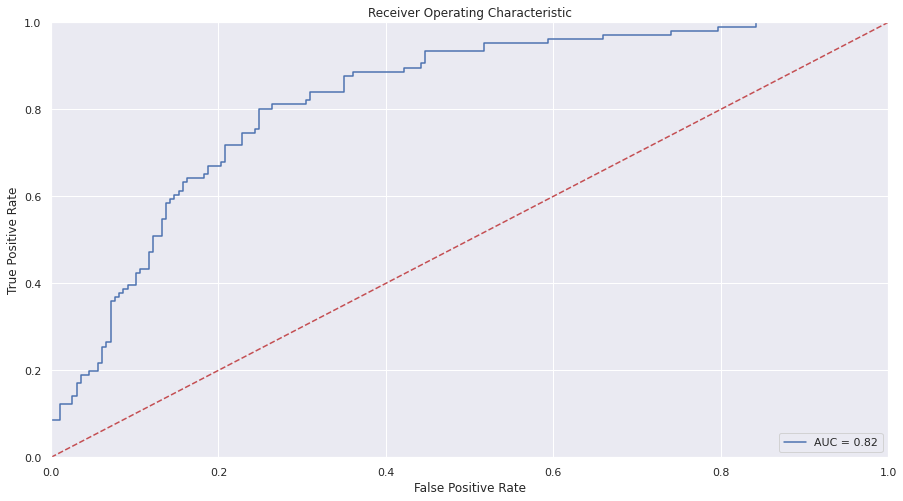

In [78]:
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(15,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#4. Welcome to Data Science

In [79]:
df_students = data[data['StudentStatus']=='Yes']
df_ds = data[(data['LearningDataScience']=="Yes, but data science is a small part of what I'm focused on learning")|(data['LearningDataScience']=="Yes, I'm focused on learning mostly data science skills")]
df_c = data[data['CareerSwitcher']=='Yes']
df_e = data[data['EmploymentStatus']=='Not employed, but looking for work']

learners = pd.concat((df_students, df_ds, df_c, df_e))
learners = learners[~learners.index.duplicated(keep='first')]

print('{} participants on this survey are learners.'.format(len(learners)))
print('In other words, {:0.2f}% of the participants on this survey are learners.'.format(100*len(learners)/len(data)))

5494 participants on this survey are learners.
In other words, 32.87% of the participants on this survey are learners.


## Demographic properties

In [82]:
sexe = learners['GenderSelect'].value_counts()
labels = (np.array(sexe.index))
proportions = (np.array((sexe / sexe.sum())*100))
trace = go.Pie(labels=labels, values=proportions, hoverinfo='label+percent')
layout = go.Layout(title='Gender distribution of learners')

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename='Career_Switcher')
fig.show(renderer="colab")

- 전체 성별에서 여성이 16.71%였는데 배우는 사람 중에는 19.2%인 것으로 보아 더욱 더 많은 여성들이 데이터 사이언스 배움에 동참하고 있음

In [83]:
print("Learners' median age", learners['Age'].median())

Learners' median age 26.0


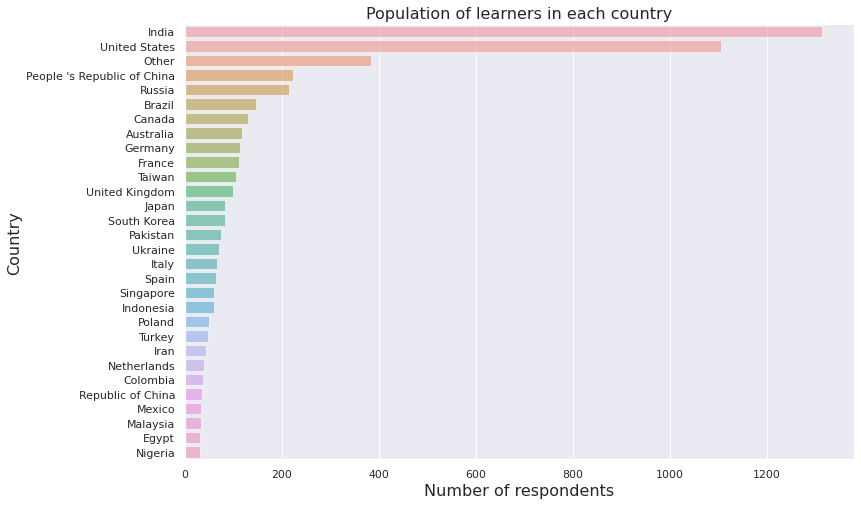

In [86]:
plt.figure(figsize=(12, 8))
countries = learners['Country'].value_counts().head(30)
sns.barplot(y=countries.index, x=countries.values, alpha=0.6)
plt.title("Population of learners in each country", fontsize=16)
plt.xlabel("Number of respondents", fontsize=16)
plt.ylabel("Country", fontsize=16)
plt.show();

- 인도인이 미국인보다 많음!

In [87]:
d_pcountries = {}
for value in data['Country'].value_counts().index:
    d_pcountries[value]=100*len(learners[learners['Country']==value])/len(data[data['Country']==value])
learners_p = pd.DataFrame.from_dict(d_pcountries, orient='index')
learners_p = learners_p.reset_index(drop=False)
learners_p.rename(columns = {'index':'Country',0:'% of learners'},inplace=True)

In [88]:
LOCDATA="""COUNTRY,GDP (BILLIONS),CODE
Afghanistan,21.71,AFG
Albania,13.40,ALB
Algeria,227.80,DZA
American Samoa,0.75,ASM
Andorra,4.80,AND
Angola,131.40,AGO
Anguilla,0.18,AIA
Antigua and Barbuda,1.24,ATG
Argentina,536.20,ARG
Armenia,10.88,ARM
Aruba,2.52,ABW
Australia,1483.00,AUS
Austria,436.10,AUT
Azerbaijan,77.91,AZE
"Bahamas, The",8.65,BHM
Bahrain,34.05,BHR
Bangladesh,186.60,BGD
Barbados,4.28,BRB
Belarus,75.25,BLR
Belgium,527.80,BEL
Belize,1.67,BLZ
Benin,9.24,BEN
Bermuda,5.20,BMU
Bhutan,2.09,BTN
Bolivia,34.08,BOL
Bosnia and Herzegovina,19.55,BIH
Botswana,16.30,BWA
Brazil,2244.00,BRA
British Virgin Islands,1.10,VGB
Brunei,17.43,BRN
Bulgaria,55.08,BGR
Burkina Faso,13.38,BFA
Burma,65.29,MMR
Burundi,3.04,BDI
Cabo Verde,1.98,CPV
Cambodia,16.90,KHM
Cameroon,32.16,CMR
Canada,1794.00,CAN
Cayman Islands,2.25,CYM
Central African Republic,1.73,CAF
Chad,15.84,TCD
Chile,264.10,CHL
"People 's Republic of China",10360.00,CHN
Colombia,400.10,COL
Comoros,0.72,COM
"Congo, Democratic Republic of the",32.67,COD
"Congo, Republic of the",14.11,COG
Cook Islands,0.18,COK
Costa Rica,50.46,CRI
Cote d'Ivoire,33.96,CIV
Croatia,57.18,HRV
Cuba,77.15,CUB
Curacao,5.60,CUW
Cyprus,21.34,CYP
Czech Republic,205.60,CZE
Denmark,347.20,DNK
Djibouti,1.58,DJI
Dominica,0.51,DMA
Dominican Republic,64.05,DOM
Ecuador,100.50,ECU
Egypt,284.90,EGY
El Salvador,25.14,SLV
Equatorial Guinea,15.40,GNQ
Eritrea,3.87,ERI
Estonia,26.36,EST
Ethiopia,49.86,ETH
Falkland Islands (Islas Malvinas),0.16,FLK
Faroe Islands,2.32,FRO
Fiji,4.17,FJI
Finland,276.30,FIN
France,2902.00,FRA
French Polynesia,7.15,PYF
Gabon,20.68,GAB
"Gambia, The",0.92,GMB
Georgia,16.13,GEO
Germany,3820.00,DEU
Ghana,35.48,GHA
Gibraltar,1.85,GIB
Greece,246.40,GRC
Greenland,2.16,GRL
Grenada,0.84,GRD
Guam,4.60,GUM
Guatemala,58.30,GTM
Guernsey,2.74,GGY
Guinea-Bissau,1.04,GNB
Guinea,6.77,GIN
Guyana,3.14,GUY
Haiti,8.92,HTI
Honduras,19.37,HND
Hong Kong,292.70,HKG
Hungary,129.70,HUN
Iceland,16.20,ISL
India,2048.00,IND
Indonesia,856.10,IDN
Iran,402.70,IRN
Iraq,232.20,IRQ
Ireland,245.80,IRL
Isle of Man,4.08,IMN
Israel,305.00,ISR
Italy,2129.00,ITA
Jamaica,13.92,JAM
Japan,4770.00,JPN
Jersey,5.77,JEY
Jordan,36.55,JOR
Kazakhstan,225.60,KAZ
Kenya,62.72,KEN
Kiribati,0.16,KIR
"Korea, North",28.00,PRK
"Korea, South",1410.00,KOR
Kosovo,5.99,KSV
Kuwait,179.30,KWT
Kyrgyzstan,7.65,KGZ
Laos,11.71,LAO
Latvia,32.82,LVA
Lebanon,47.50,LBN
Lesotho,2.46,LSO
Liberia,2.07,LBR
Libya,49.34,LBY
Liechtenstein,5.11,LIE
Lithuania,48.72,LTU
Luxembourg,63.93,LUX
Macau,51.68,MAC
Macedonia,10.92,MKD
Madagascar,11.19,MDG
Malawi,4.41,MWI
Malaysia,336.90,MYS
Maldives,2.41,MDV
Mali,12.04,MLI
Malta,10.57,MLT
Marshall Islands,0.18,MHL
Mauritania,4.29,MRT
Mauritius,12.72,MUS
Mexico,1296.00,MEX
"Micronesia, Federated States of",0.34,FSM
Moldova,7.74,MDA
Monaco,6.06,MCO
Mongolia,11.73,MNG
Montenegro,4.66,MNE
Morocco,112.60,MAR
Mozambique,16.59,MOZ
Namibia,13.11,NAM
Nepal,19.64,NPL
Netherlands,880.40,NLD
New Caledonia,11.10,NCL
New Zealand,201.00,NZL
Nicaragua,11.85,NIC
Nigeria,594.30,NGA
Niger,8.29,NER
Niue,0.01,NIU
Northern Mariana Islands,1.23,MNP
Norway,511.60,NOR
Oman,80.54,OMN
Pakistan,237.50,PAK
Palau,0.65,PLW
Panama,44.69,PAN
Papua New Guinea,16.10,PNG
Paraguay,31.30,PRY
Peru,208.20,PER
Philippines,284.60,PHL
Poland,552.20,POL
Portugal,228.20,PRT
Puerto Rico,93.52,PRI
Qatar,212.00,QAT
Romania,199.00,ROU
Russia,2057.00,RUS
Rwanda,8.00,RWA
Saint Kitts and Nevis,0.81,KNA
Saint Lucia,1.35,LCA
Saint Martin,0.56,MAF
Saint Pierre and Miquelon,0.22,SPM
Saint Vincent and the Grenadines,0.75,VCT
Samoa,0.83,WSM
San Marino,1.86,SMR
Sao Tome and Principe,0.36,STP
Saudi Arabia,777.90,SAU
Senegal,15.88,SEN
Serbia,42.65,SRB
Seychelles,1.47,SYC
Sierra Leone,5.41,SLE
Singapore,307.90,SGP
Sint Maarten,304.10,SXM
Slovakia,99.75,SVK
Slovenia,49.93,SVN
Solomon Islands,1.16,SLB
Somalia,2.37,SOM
South Africa,341.20,ZAF
South Sudan,11.89,SSD
Spain,1400.00,ESP
Sri Lanka,71.57,LKA
Sudan,70.03,SDN
Suriname,5.27,SUR
Swaziland,3.84,SWZ
Sweden,559.10,SWE
Switzerland,679.00,CHE
Syria,64.70,SYR
Taiwan,529.50,TWN
Tajikistan,9.16,TJK
Tanzania,36.62,TZA
Thailand,373.80,THA
Timor-Leste,4.51,TLS
Togo,4.84,TGO
Tonga,0.49,TON
Trinidad and Tobago,29.63,TTO
Tunisia,49.12,TUN
Turkey,813.30,TUR
Turkmenistan,43.50,TKM
Tuvalu,0.04,TUV
Uganda,26.09,UGA
Ukraine,134.90,UKR
United Arab Emirates,416.40,ARE
United Kingdom,2848.00,GBR
United States,17420.00,USA
Uruguay,55.60,URY
Uzbekistan,63.08,UZB
Vanuatu,0.82,VUT
Venezuela,209.20,VEN
Vietnam,187.80,VNM
Virgin Islands,5.08,VGB
West Bank,6.64,WBG
Yemen,45.45,YEM
Zambia,25.61,ZMB
Zimbabwe,13.74,ZWE
    """

with open("location_map.csv", "w") as ofile:
    ofile.write(LOCDATA)

In [92]:
loc_df = pd.read_csv("location_map.csv")
new_df = pd.merge(learners_p, loc_df, left_on="Country", right_on="COUNTRY")
new_df = new_df[['Country','CODE','% of learners']]
data_t = [ dict(
        type = 'choropleth',
        locations = new_df['CODE'],
        z = new_df['% of learners'],
        text = new_df['Country'],
        #colorscale = [[0,"rgb(5, 10, 172)"],[10,"rgb(40, 60, 190)"],[20,"rgb(70, 100, 245)"],\
        #    [30,"rgb(90, 120, 245)"],[40,"rgb(200, 200, 200)"],[4500,"rgb(220, 220, 220)"]],
        colorscale = [[0,"rgb(210, 210, 210)"], [4500,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = 'Proportion of learners (in%)'),
      ) ]
layout = dict(
    title = 'Country wise proportion of learners',
    geo = dict(
        showframe = False,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data_t, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map')

In [93]:
edu = learners['FormalEducation'].value_counts()
labels = (np.array(edu.index))
values = (np.array((edu / edu.sum())*100))

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textfont=dict(size=20), showlegend=False)
layout = go.Layout(title='Formal Education of learners respondents')
data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Formal_Education2")
fig.show(renderer="colab")

- 대부분의 학습자는 학사 출신 > 아직 공부를 끝마치지 않음

## Platforms used for learning

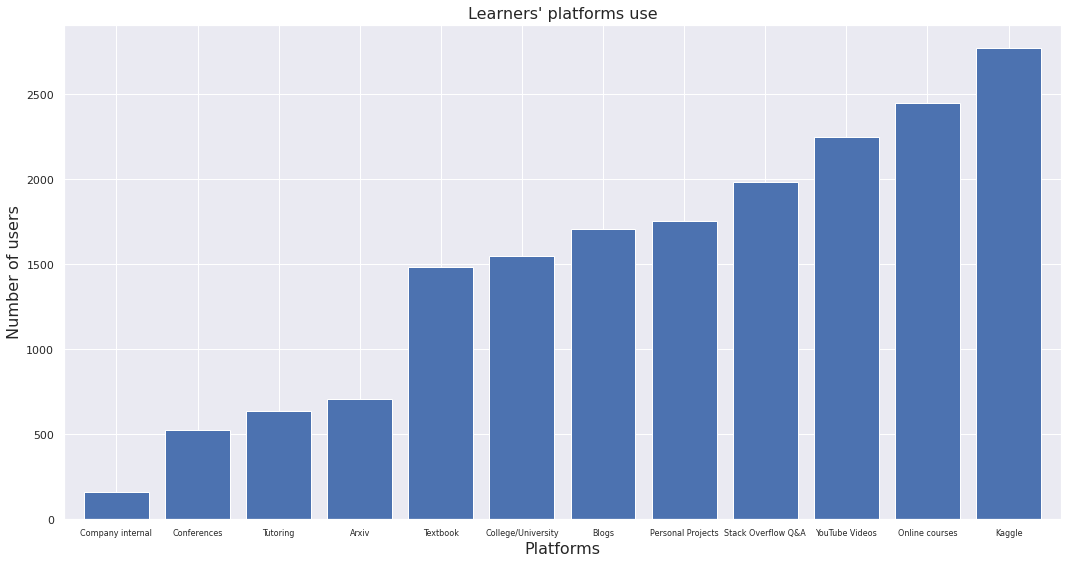

In [94]:
d_plat = {}
platforms = ['College/University','Kaggle','Online courses','Arxiv','Company internal','Textbook',
             'Personal Projects','Stack Overflow Q&A','Blogs','Tutoring','Conferences','YouTube Videos']
for platform in platforms : 
    d_plat[platform] = 0
    for elem in learners['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem : 
            d_plat[platform]+=1
            

s = pd.DataFrame.from_dict(data=d_plat,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar',figsize=(15,8),width=0.8,align='center')
ax.legend_.remove()
ax.set_title("Learners' platforms use",fontsize=16)
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(8)
plt.tight_layout()

- kaggle 온라인 코스가 가장 인기 많았고, 대학은 7위에 머무름 > 학습자의 평균나이가 26세이고, 직업 전환을 준비하고 있기 때문은 아닐까?

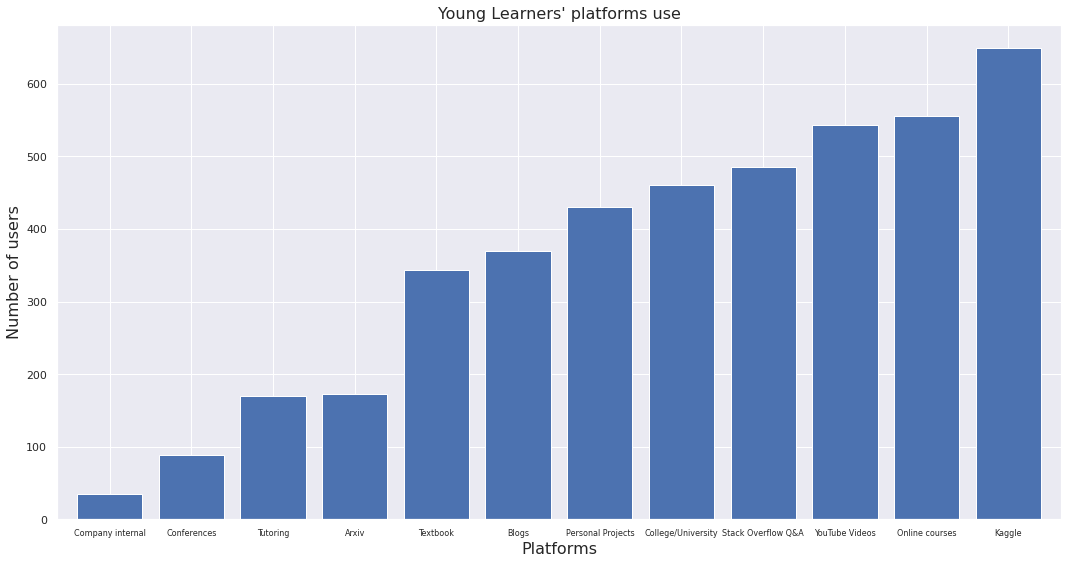

In [95]:
data_young = learners[(learners['Age']<=22) ]
d_plat2 = {}
for platform in platforms : 
    d_plat2[platform] = 0
    for elem in data_young['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem : 
            d_plat2[platform]+=1

s = pd.DataFrame.from_dict(data=d_plat2,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar',figsize=(15,8),width=0.8,align='center')
ax.legend_.remove()
ax.set_title("Young Learners' platforms use",fontsize=16)
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(8)
plt.tight_layout()

- 대학이 7위에서 5위로 올라왔지만 여전히 눈에 띄지 않음

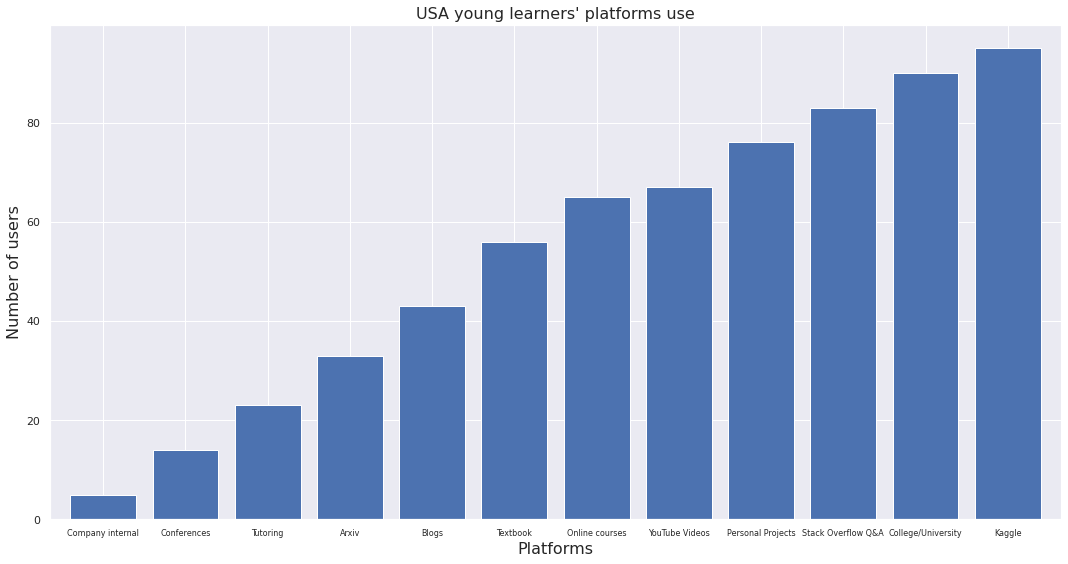

In [96]:
data_young = learners[(learners['Age']<=22) & (learners['Country']=='United States')]
d_plat2={}
for platform in platforms : 
    d_plat2[platform]=0
    for elem in data_young['LearningPlatformSelect'].fillna('Other/Missing'):
        if platform in elem : 
            d_plat2[platform]+=1


s=pd.DataFrame.from_dict(data=d_plat2,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='bar',figsize=(15,8),width=0.8,align='center')
ax.legend_.remove()
ax.set_title("USA young learners' platforms use",fontsize=16)
ax.set_xlabel("Platforms", fontsize=16)
ax.set_ylabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(8)
plt.tight_layout()

- 드디어 대학이 2위 > 아마 다른나라에는 아직 데이터 학과가 개설되지 않았을수도

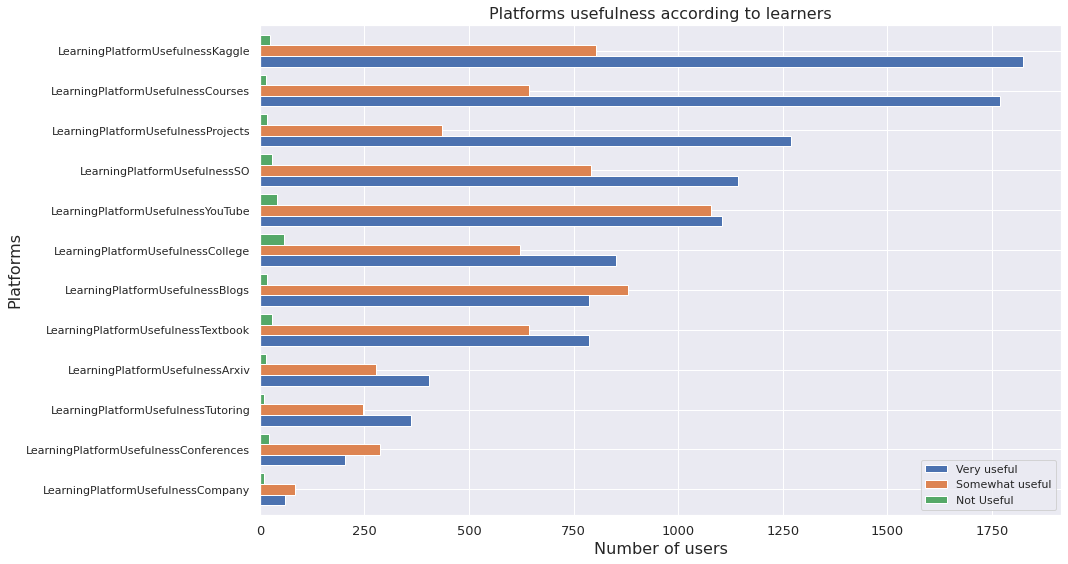

In [97]:
d_useful={}
plat_use=['LearningPlatformUsefulnessArxiv','LearningPlatformUsefulnessBlogs','LearningPlatformUsefulnessCollege',
          'LearningPlatformUsefulnessCompany','LearningPlatformUsefulnessConferences',
          'LearningPlatformUsefulnessKaggle','LearningPlatformUsefulnessCourses','LearningPlatformUsefulnessProjects',
          'LearningPlatformUsefulnessSO','LearningPlatformUsefulnessTextbook','LearningPlatformUsefulnessTutoring',
          'LearningPlatformUsefulnessYouTube']
for plat in plat_use : 
    L=learners[plat].value_counts()
    d_useful[plat]={'Very useful':L.loc['Very useful'],
                    'Somewhat useful':L.loc['Somewhat useful'],
                    'Not Useful':L.loc['Not Useful']}

s=pd.DataFrame.from_dict(data=d_useful,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='barh',figsize=(15,8),width=0.8,align='center')
ax.set_title("Platforms usefulness according to learners",fontsize=16)
ax.set_ylabel("Platforms", fontsize=16)
ax.set_xlabel("Number of users", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(13)
plt.tight_layout()

- kaggle과 coursera가 데이터 사이언스 학습에 가장 많이 사용되는 플랫폼

In [99]:
d_online={}
online_plat= ['Coursera','Udacity','edX',
              'DataCamp','Other']
for plat in online_plat : 
    d_online[plat]=0
    for elem in learners['CoursePlatformSelect'].fillna('Missing'):
        if plat in elem :
            d_online[plat]+=1

online = pd.DataFrame.from_dict(d_online,orient='index')

labels = (np.array(online.index))
proportions = np.array((online[0] / online[0].sum())*100)

trace = go.Pie(labels=labels, values=proportions,
              hoverinfo='label+percent')

layout = go.Layout(
    title='Online Platforms popularity'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Online_plat")
fig.show(renderer="colab")

## Method and Tool to learn next year

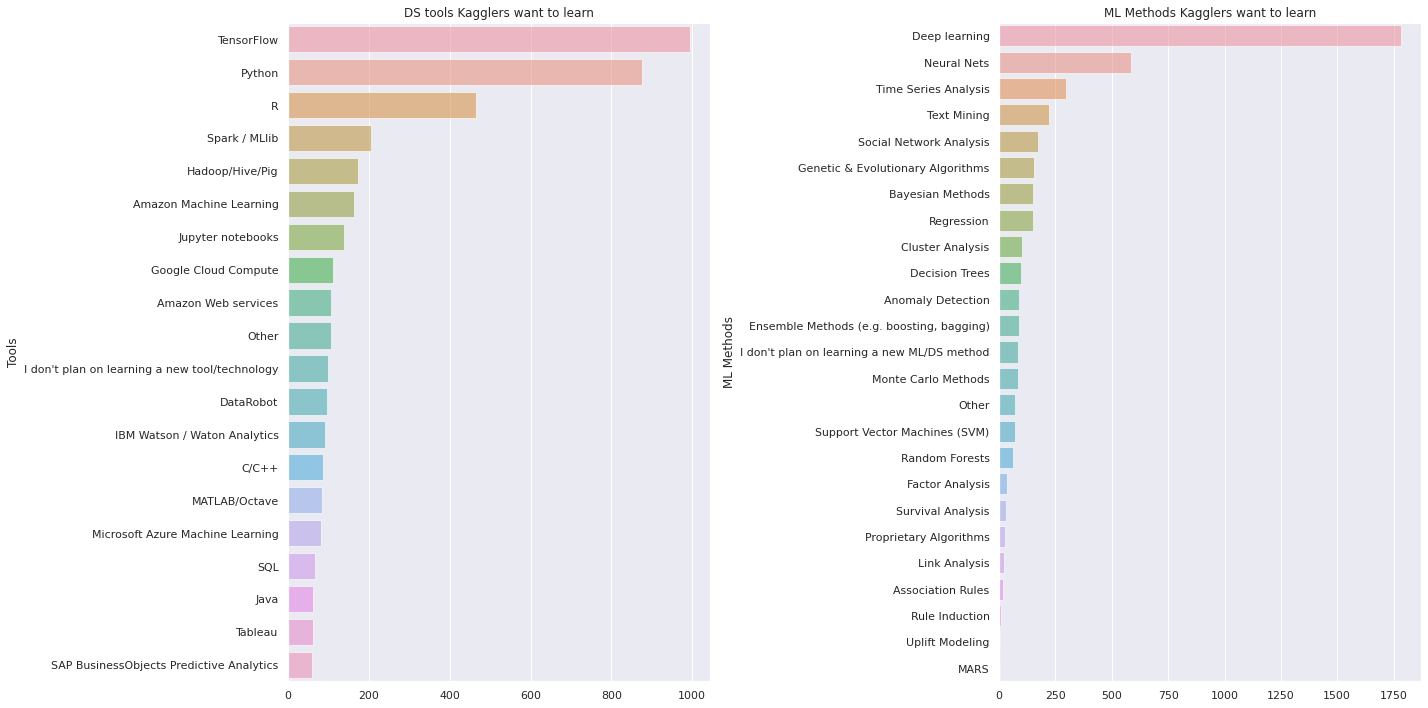

In [100]:
f,ax=plt.subplots(1,2,figsize=(20,10))

tools = learners['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=tools.index, x=tools.values, alpha=0.6,ax=ax[0])
ax[0].set_title('DS tools Kagglers want to learn')
ax[0].set_xlabel('')
ax[0].set_ylabel('Tools')

methods = learners['MLMethodNextYearSelect'].value_counts()
sns.barplot(y=methods.index, x=methods.values, alpha=0.6,ax=ax[1])
ax[1].set_title('ML Methods Kagglers want to learn')
ax[1].set_xlabel('')
ax[1].set_ylabel('ML Methods')

plt.tight_layout()
plt.show()

- 캐글러가 가장 배우고 싶어하는 방법은 딥러닝, 딥러닝을 사용하는 도구는 Tensorflow

## Time invested on DS training

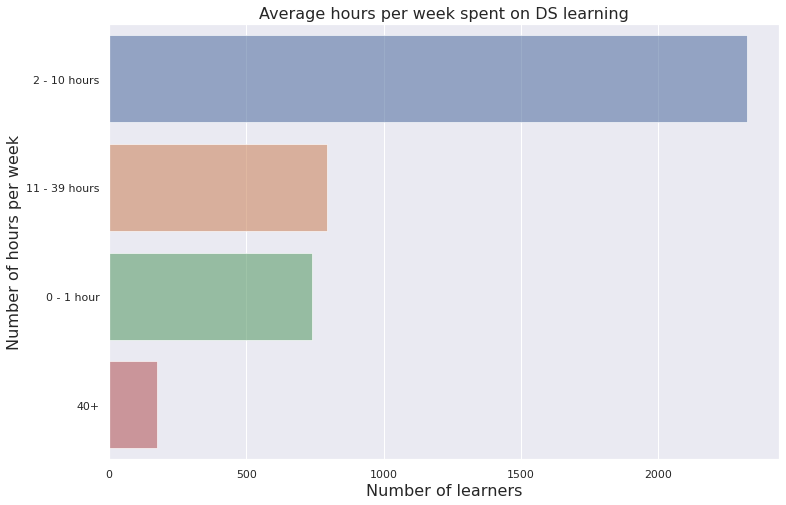

In [101]:
plt.figure(figsize=(12,8))
time = data['TimeSpentStudying'].value_counts()
sns.barplot(y=time.index, x=time.values, alpha=0.6)
plt.title("Average hours per week spent on DS learning", fontsize=16)
plt.xlabel("Number of learners", fontsize=16)
plt.ylabel("Number of hours per week", fontsize=16)
plt.show();

- 한 주에 2-10시간 정도 학습하지만 약 1000명은 11시간 이상 학습 중

In [102]:
start = data['LearningDataScienceTime'].value_counts()
labels = (np.array(start.index))
values = (np.array((start / edu.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20))

layout = go.Layout(
    title='Years invested in Data Science Learning'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="nb_yers")
fig.show(renderer="colab")

- 84.1%의 학습자가 2년 미만으로 공부중

## Skills and proofs of knowledge for landing a DS job

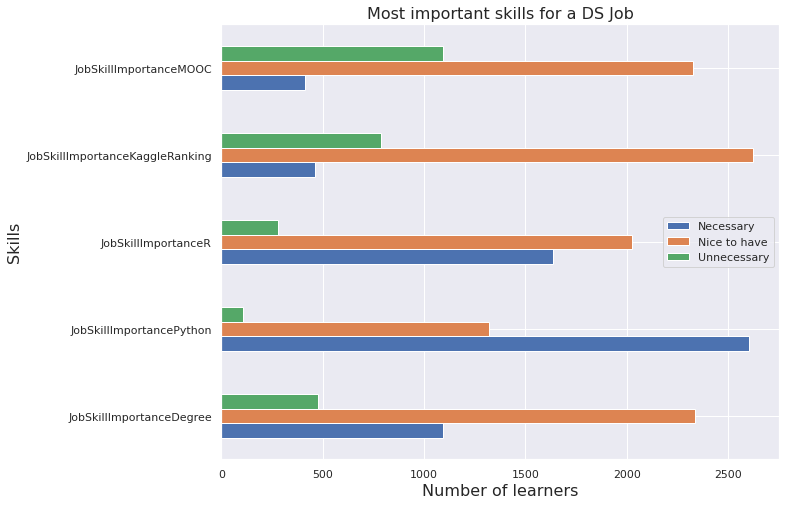

In [103]:
df2=data
d_jobskills={}
job_skills = ['JobSkillImportanceDegree','JobSkillImportancePython','JobSkillImportanceR',
              'JobSkillImportanceKaggleRanking','JobSkillImportanceMOOC']

for skill in job_skills : 
    L=df2[skill].value_counts()
    d_jobskills[skill]={'Necessary':L.loc['Necessary'],
                        'Nice to have':L.loc['Nice to have'],
                        'Unnecessary':L.loc['Unnecessary']}


(pd.DataFrame(d_jobskills)).transpose().plot(kind='barh',figsize=(10,8))
plt.title("Most important skills for a DS Job", fontsize=16)          
plt.xlabel("Number of learners", fontsize=16)
plt.ylabel("Skills", fontsize=16)

plt.show();

- python 마스터하는 것이 가장 중요한 기술

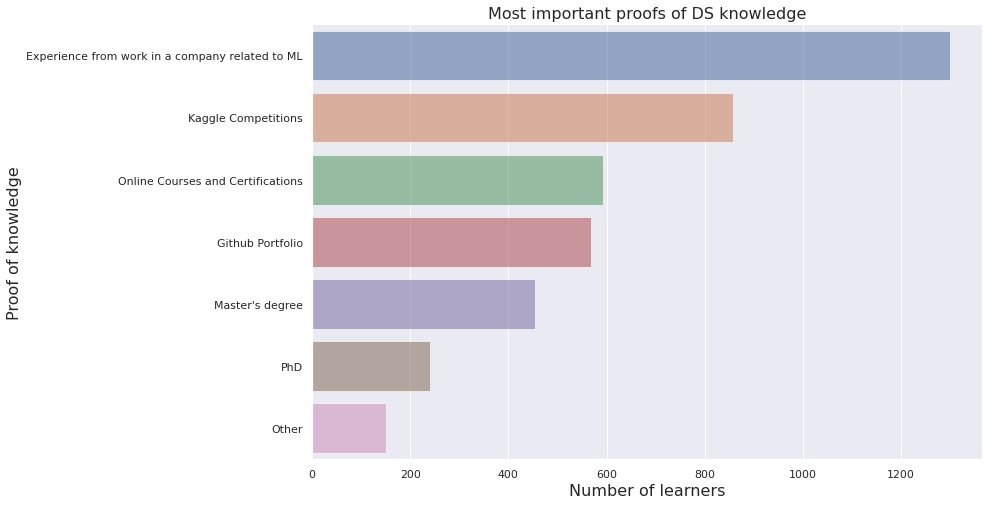

In [104]:
plt.figure(figsize=(12,8))
proof = learners['ProveKnowledgeSelect'].value_counts()
sns.barplot(y=proof.index, x=proof.values, alpha=0.6)
plt.title("Most important proofs of DS knowledge", fontsize=16)
plt.xlabel("Number of learners", fontsize=16)
plt.ylabel("Proof of knowledge", fontsize=16)
plt.show();

- 가장 중요한 것은 관련된 경험

## Learner's job hunt

In [105]:
job_s = learners['JobSearchResource'].value_counts()
labels = (np.array(job_s.index))
values = (np.array((job_s / job_s.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=False)

layout = go.Layout(
    title='Most used resources for finding a DS job'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Job_resource")
fig.show(renderer="colab")

학습자에 따른 Top 3 resources
1. 회사 구인구직 공고란
2. 테크 사이트 게시판 (stackoverflow recruitment platform for example)
3. 일반적인 구직 사이트 (LinkedIn)


In [106]:
job_s = learners['JobHuntTime'].value_counts()
labels = (np.array(job_s.index))
values = (np.array((job_s / job_s.sum())*100))

trace = go.Pie(labels=labels, values=values,
              hoverinfo='label+percent',
               textfont=dict(size=20),
                showlegend=True)

layout = go.Layout(title='Hours per week spent  looking for a data science job?'
)

data_trace = [trace]
fig = go.Figure(data=data_trace, layout=layout)
py.iplot(fig, filename="Job_resource")
fig.show(renderer="colab")

- 40.2%의 학습자는 현재 구직활동을 하지 않음
- 34.5%의 학습자는 1-2시간 이내로 직업을 검색함 > 급하지 않은 상태

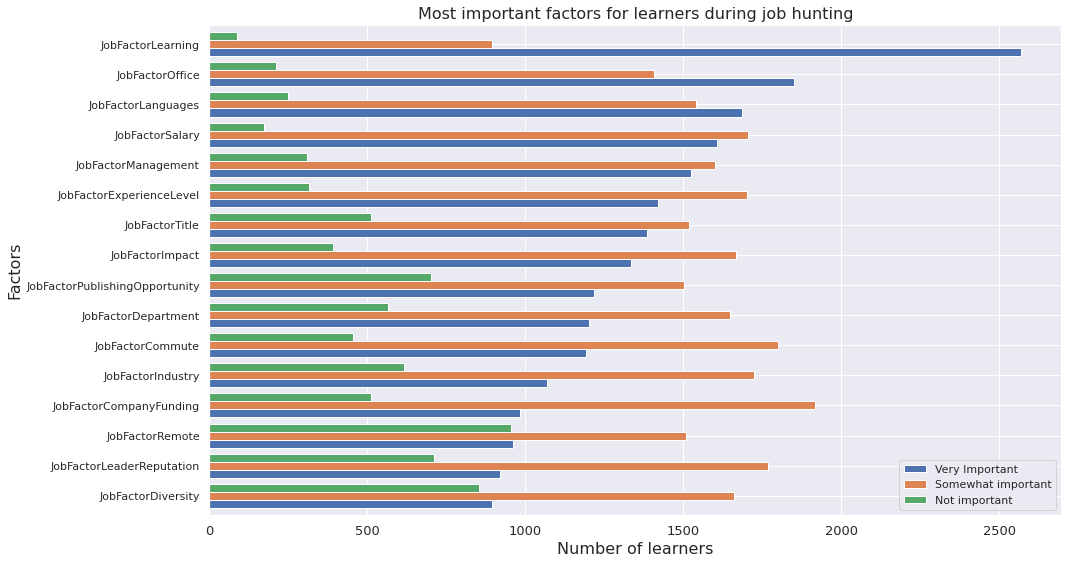

In [107]:
d_criterias={}
criterias_job=['JobFactorLearning','JobFactorSalary','JobFactorOffice','JobFactorLanguages',
               'JobFactorCommute','JobFactorManagement','JobFactorExperienceLevel',
               'JobFactorDepartment','JobFactorTitle','JobFactorCompanyFunding','JobFactorImpact',
               'JobFactorRemote','JobFactorIndustry','JobFactorLeaderReputation','JobFactorDiversity',
               'JobFactorPublishingOpportunity']
for criteria in criterias_job : 
    L=df2[criteria].value_counts()
    d_criterias[criteria]={'Very Important':L.loc['Very Important'],
                           'Somewhat important':L.loc['Somewhat important'],
                           'Not important':L.loc['Not important']}
    
s=pd.DataFrame.from_dict(data=d_criterias,orient='index')
s.sort_values(by=list(s),axis=0, ascending=True, inplace=True)
ax = s.plot(kind='barh',figsize=(15,8),width=0.8,align='center')
ax.set_title("Most important factors for learners during job hunting",fontsize=16)
ax.set_ylabel("Factors", fontsize=16)
ax.set_xlabel("Number of learners", fontsize=16)
for tick in ax.get_xticklabels():
    tick.set_rotation(0)
    tick.set_fontsize(13)
plt.tight_layout()

학습자들이 구직에 있어 고려하는 사항
1. 학습자들은 발전하기 위해 끊임없이 노력 중이며, 전문성을 개발할 수 있을지
2. 사무실 환경
3. 프로그래밍 언어와 프레임워크
4. 연봉

# Conclusion

[분석 관점에서]
- 캐글러의 성별 차이는 엄청 크다.
- Python과 R은 모두 학습하는 것이 좋다.
- 학습자들이 가장 선호하는 플랫폼은 Kaggle이다.

[기술 관점에서]
- 두가지 범주형 변수 간 독립성을 검정할때는 카이제곱검정을 사용해야 한다.
- 소득과 관련된 연구를 수행할 때, 전체 나라를 병합해서 사용하면 일반적으로 잘못된 결과를 얻을 확률이 높다.
- PCA는 범주형 변수를 다룰 수 있는 덜 알려진 도구이지만, 아름다운 그래프를 그릴 수 있다.
- 머신러닝을 위해 항상 확률적인 모델을 사용해야 할 필요는 없다. 
- 불균형한 데이터를 다룰 때, 정확도만 확인하는 것은 모델을 잘못 해석할 수도 있다.